In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functions import *
# from pandas_profiling import ProfileReport
import timeit

In [2]:
start_time_ALL = timeit.default_timer()

# Import des données

In [3]:
building_2015 = pd.read_csv('../01_DATA/2015-building-energy-benchmarking.csv')

In [4]:
building_2016 = pd.read_csv('../01_DATA/2016-building-energy-benchmarking.csv')

In [5]:
# prof2015 = ProfileReport(building_2015)
# prof2015.to_file(output_file='rapport2015.html')

In [6]:
building_2015.shape

(3340, 47)

In [7]:
building_2016.shape

(3376, 46)

In [8]:
building_2015 = building_2015.astype({'OSEBuildingID': str, 'DataYear': str, 'Zip Codes':str})
building_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   object 
 1   DataYear                                                       3340 non-null   object 
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [9]:
building_2016 = building_2016.astype({'OSEBuildingID': str, 'DataYear': str, 'ZipCode' : str})
building_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   object 
 1   DataYear                         3376 non-null   object 
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3376 non-null   object 
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
building_2015.describe()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
count,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,...,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000
mean,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,...,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644
std,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,...,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287
min,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000
25%,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,...,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000
50%,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,...,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000
75%,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,...,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000
max,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,...,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000


# Visualisation des données quantitatives

In [11]:
# selection données quantitatives
building_2015_qtt = building_2015.select_dtypes(['float64', 'int64'])
building_2015_qtt.info()

building_2016_qtt = building_2016.select_dtypes(['float64', 'int64'])
building_2016_qtt = building_2016_qtt.drop('Comments', axis=1)
building_2016_qtt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   CouncilDistrictCode                                            3340 non-null   int64  
 1   YearBuilt                                                      3340 non-null   int64  
 2   NumberofBuildings                                              3340 non-null   int64  
 3   NumberofFloors                                                 3332 non-null   float64
 4   PropertyGFATotal                                               3340 non-null   int64  
 5   PropertyGFAParking                                             3340 non-null   int64  
 6   PropertyGFABuilding(s)                                         3340 non-null   int64  
 7   LargestPropertyUseTypeGFA                                   

In [12]:
building_2016['Comments'].unique()

array([nan])

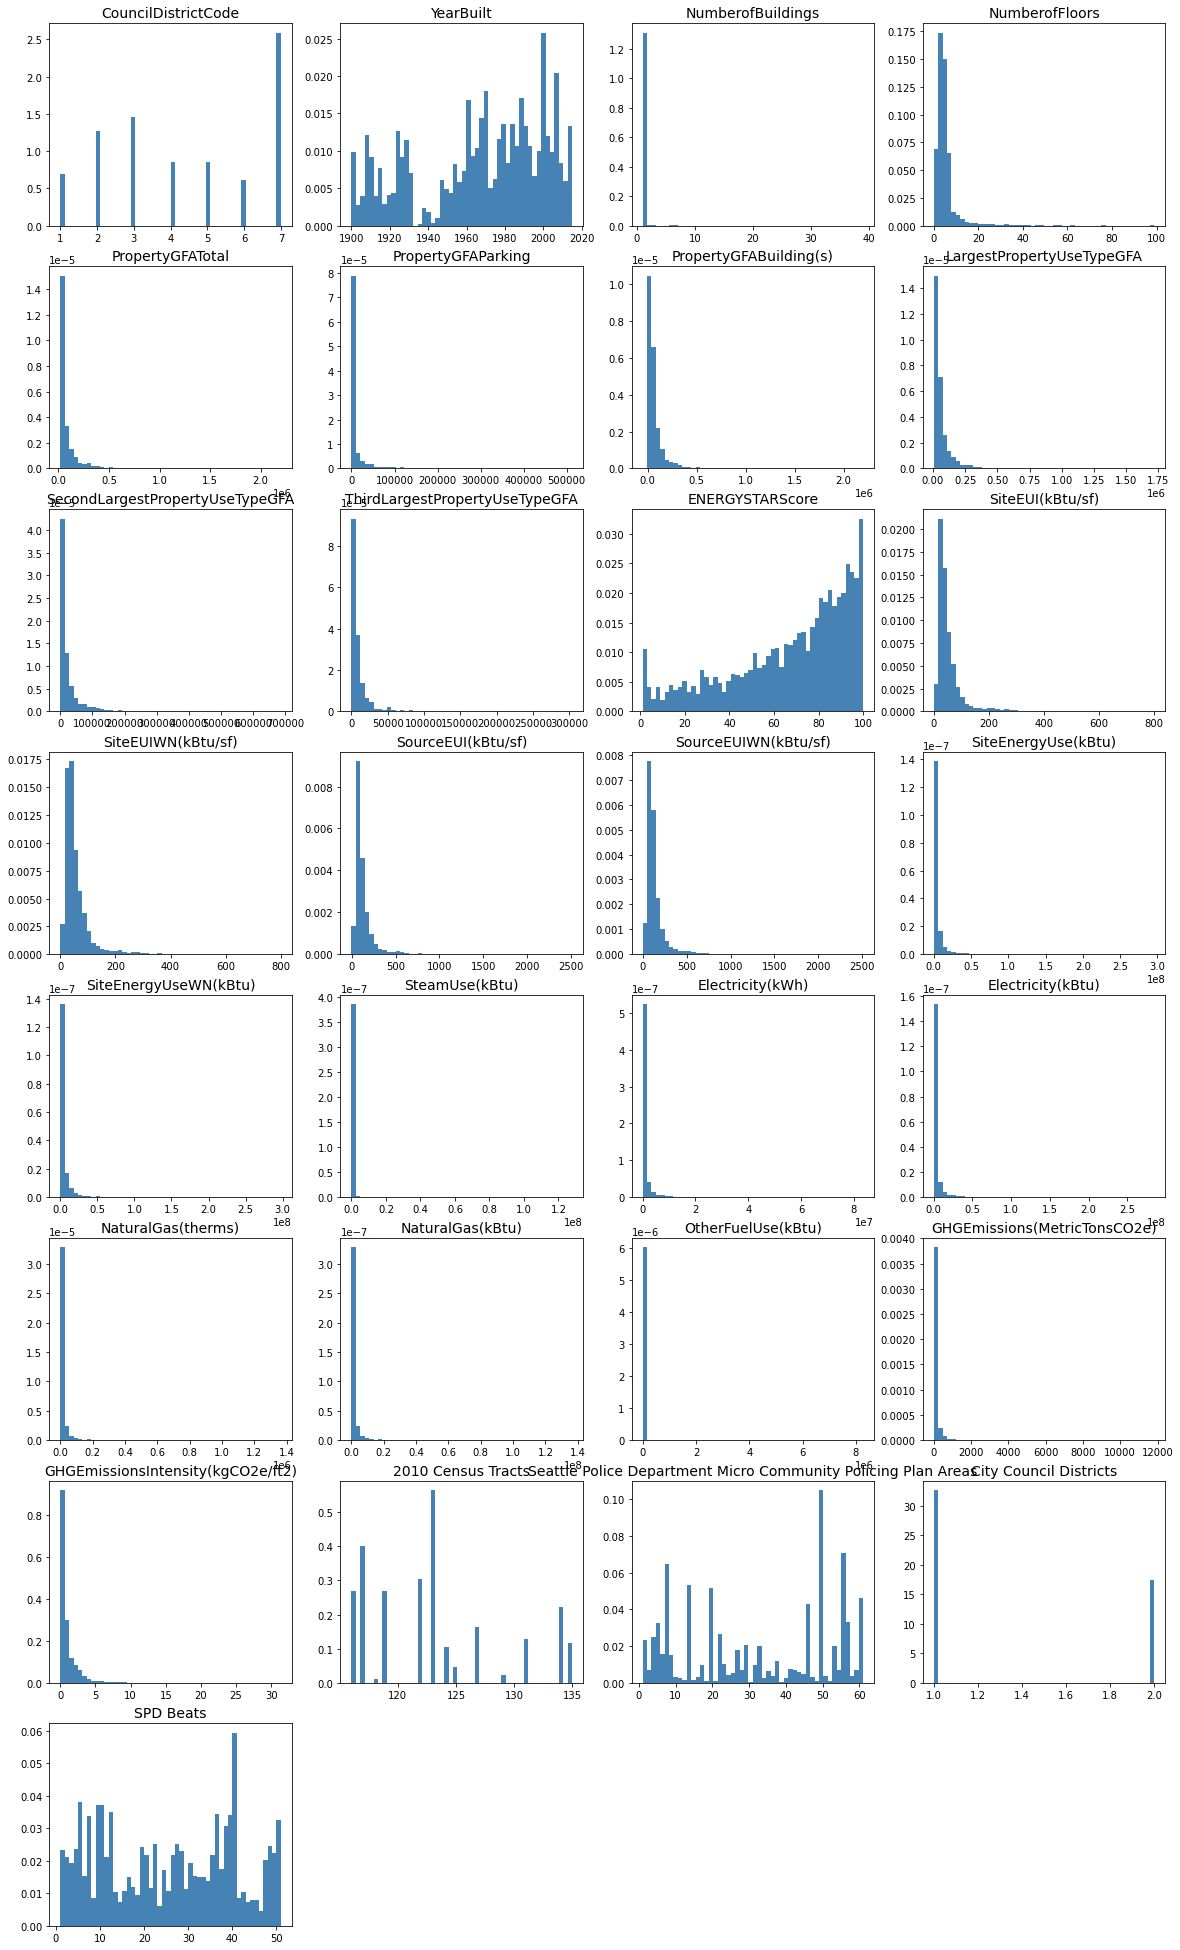

In [13]:
fig = plt.figure(figsize=(20, 35))
for feat_idx in range(building_2015_qtt.shape[1]):
#     print(feat_idx)
    ax = fig.add_subplot(8,4, (feat_idx+1))
#     print(building_2015_qtt.iloc[:, feat_idx])
    h = ax.hist(building_2015_qtt.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(building_2015_qtt.columns[feat_idx], fontsize=14)

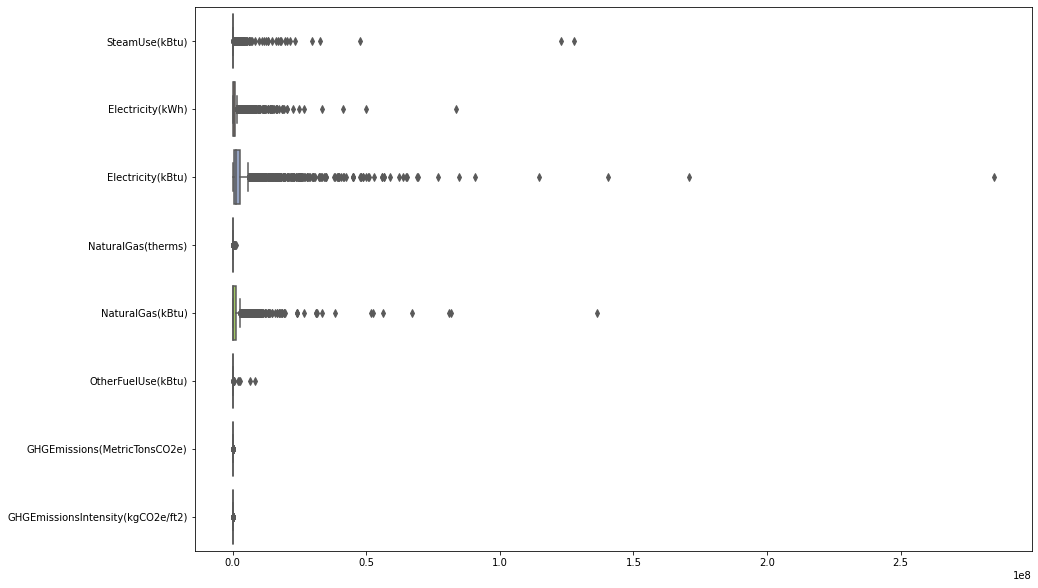

In [14]:
fig = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=building_2015_qtt.iloc[:,17:25], orient="h", palette="Set2")

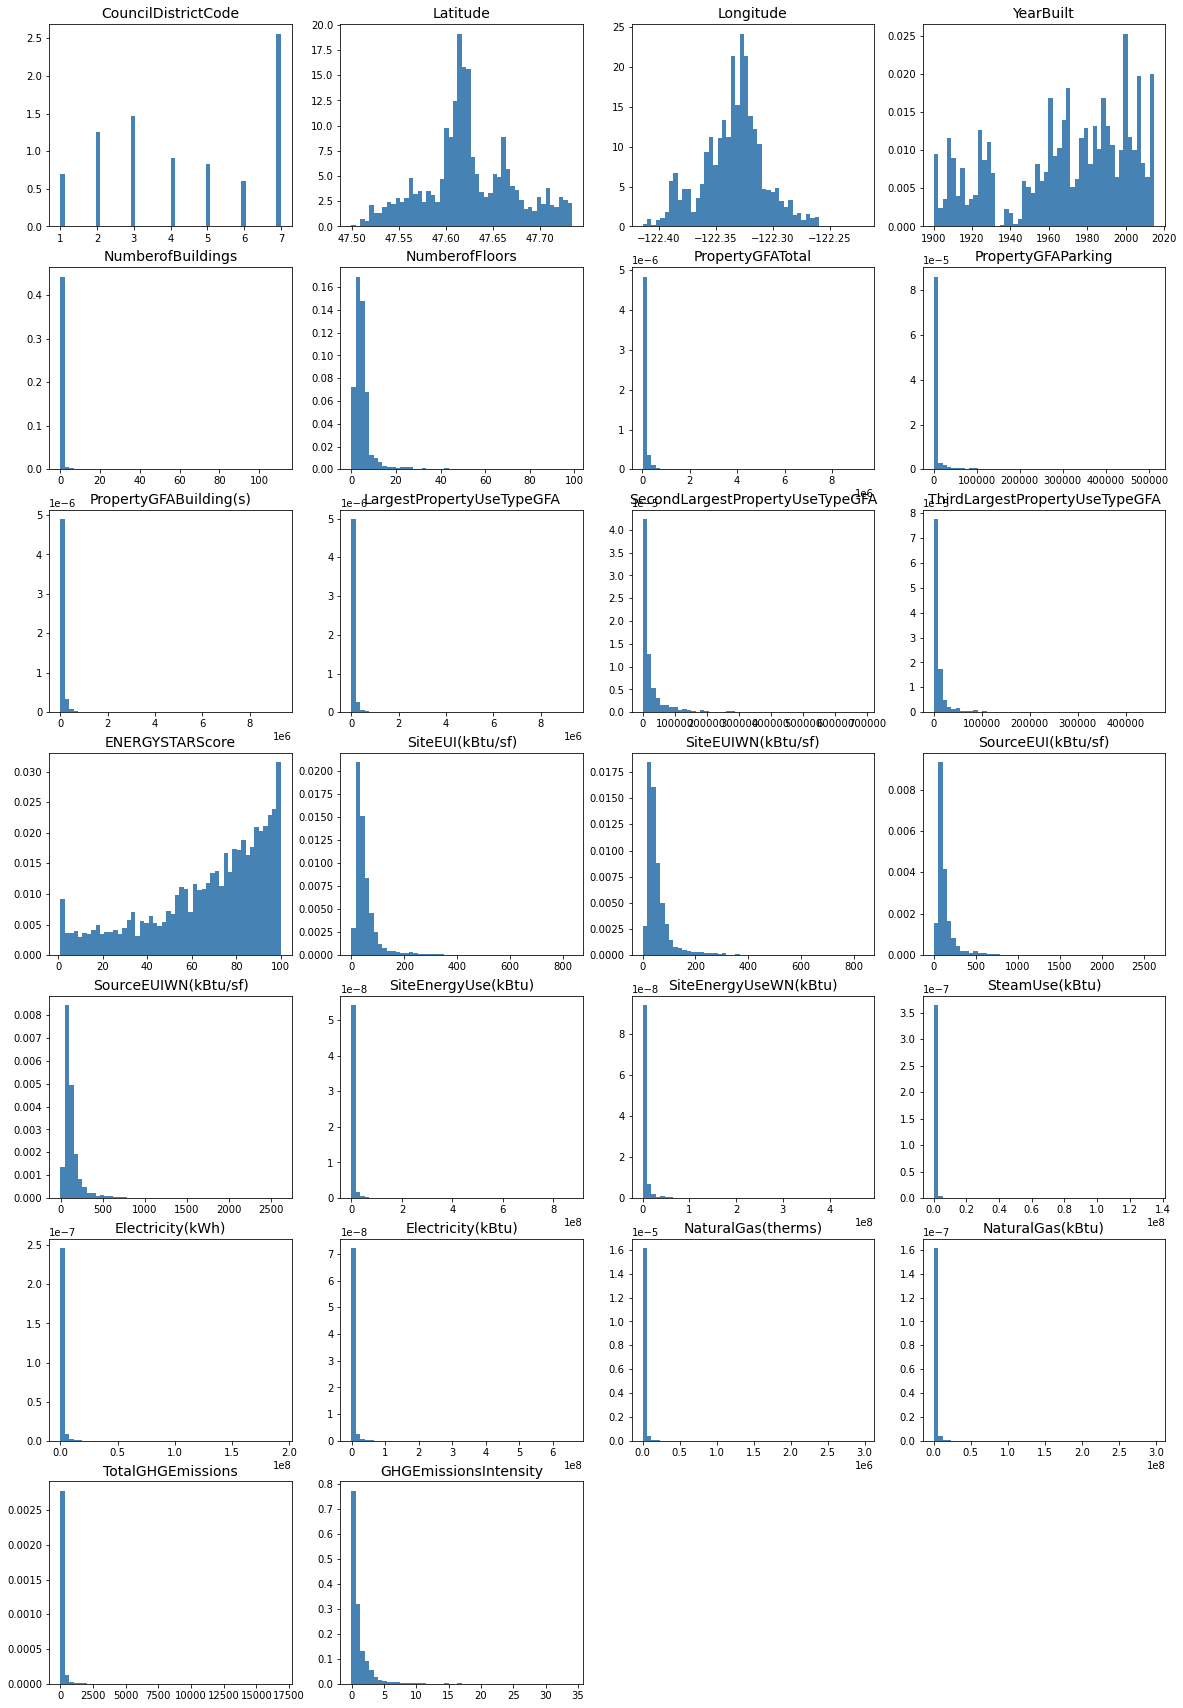

In [15]:
fig = plt.figure(figsize=(20, 35))
for feat_idx in range(building_2016_qtt.shape[1]):
#     print(feat_idx)
    ax = fig.add_subplot(8,4, (feat_idx+1))
#     print(building_2015_qtt.iloc[:, feat_idx])
    h = ax.hist(building_2016_qtt.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(building_2016_qtt.columns[feat_idx], fontsize=14)

In [16]:
# proportion de données non renseignées sur tout les dfs
pourcent_NA_df(building_2015)
pourcent_NA_df(building_2016)

Il y a 83.11% valeurs renseignées (soit 16.89 % de valeurs manquantes) dans l'intégralité du df
Il y a 87.16% valeurs renseignées (soit 12.84 % de valeurs manquantes) dans l'intégralité du df


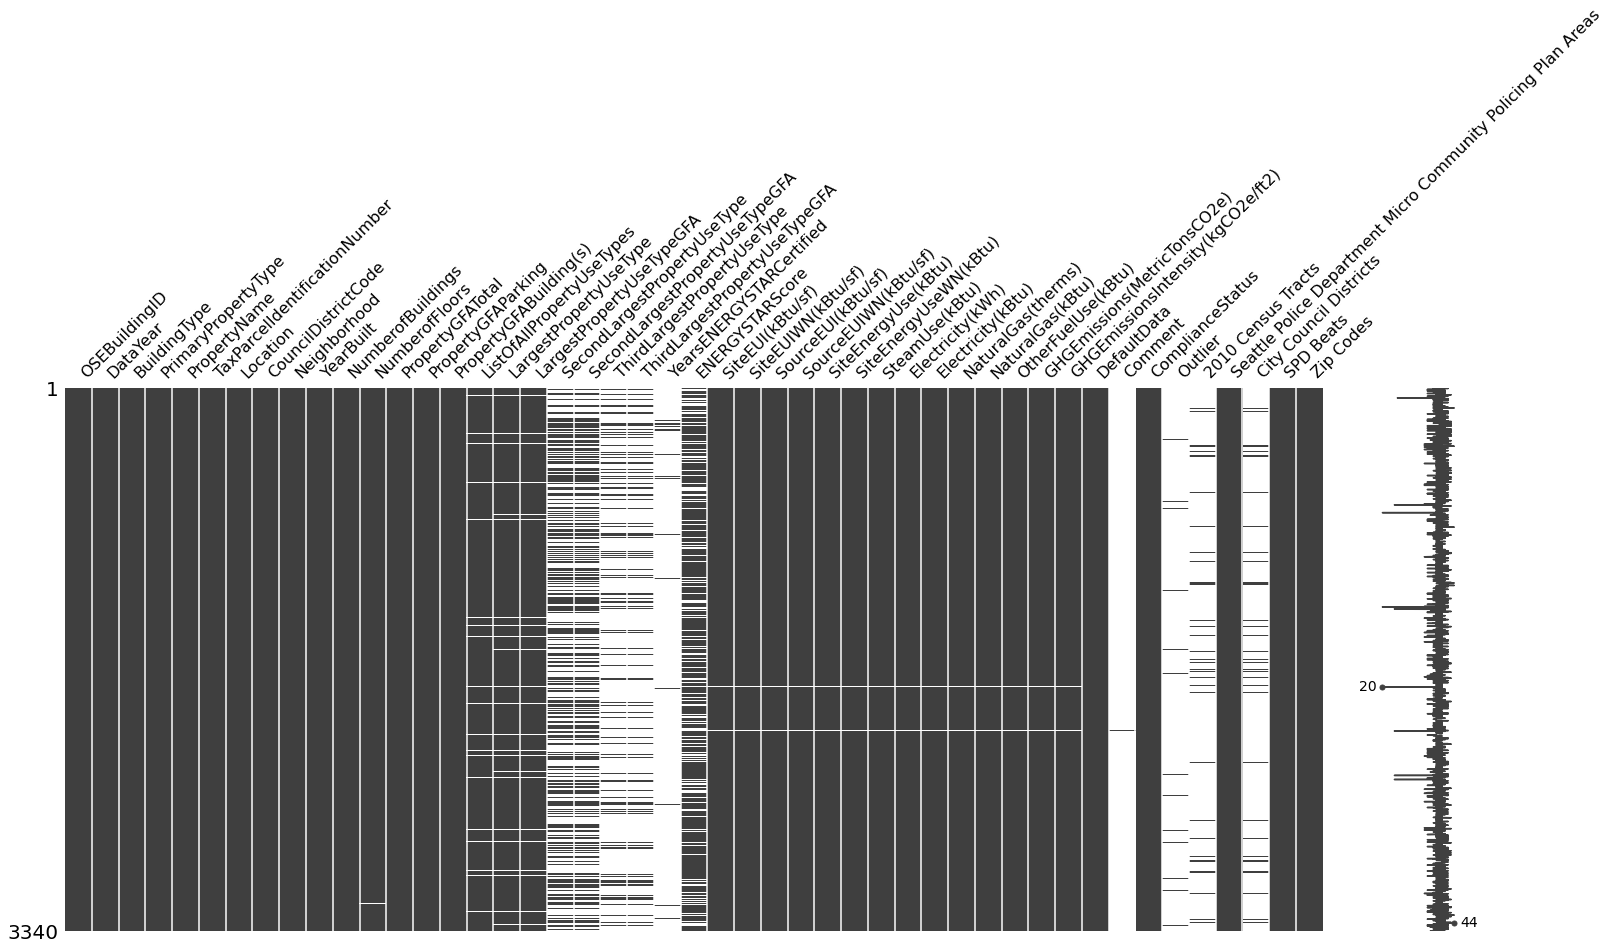

In [17]:
# visualisation des valeurs manquantes / renseignées
import missingno as msno
%matplotlib inline
msno.matrix(building_2015);

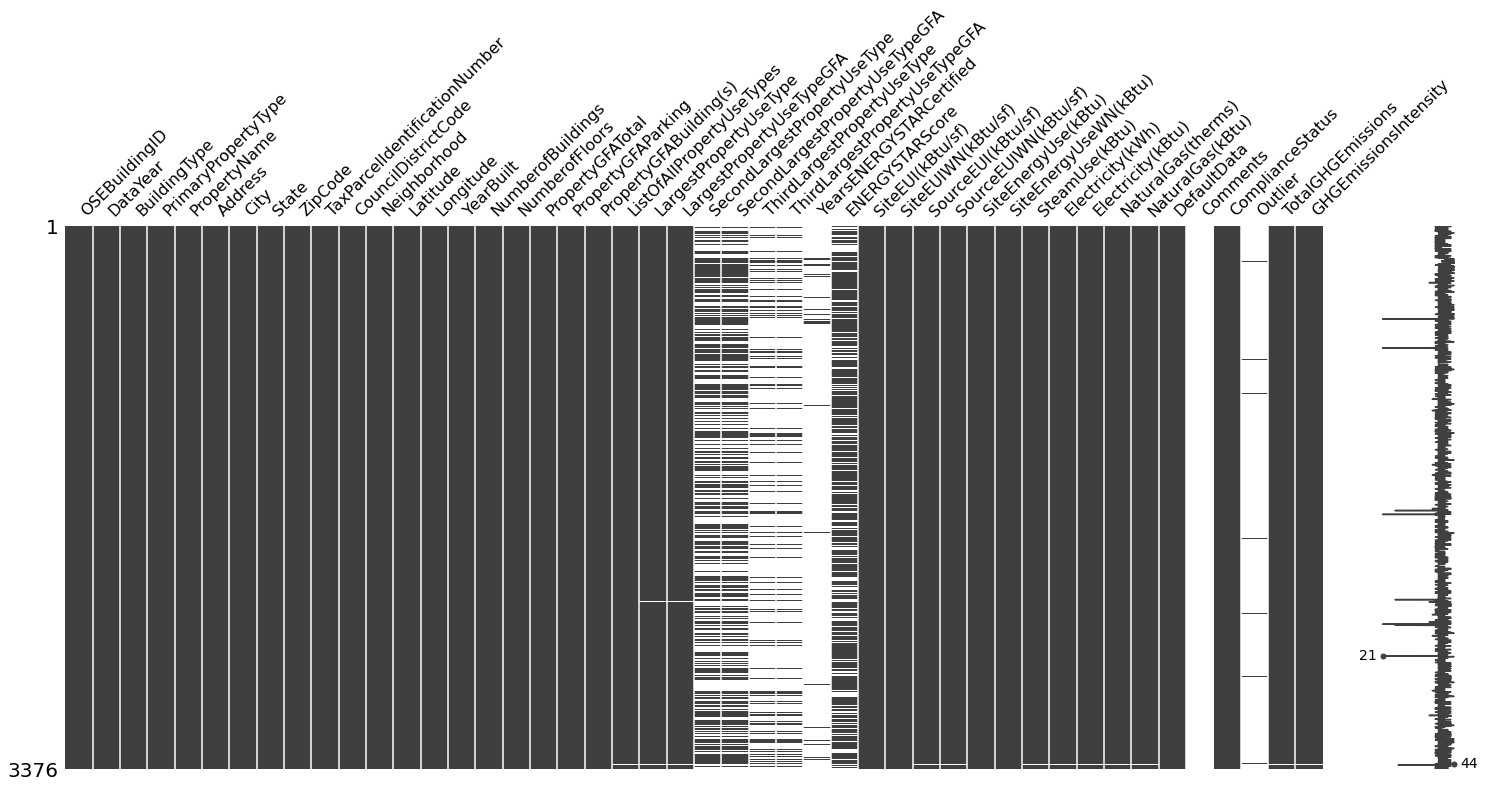

In [18]:
# visualisation des valeurs manquantes / renseignées
import missingno as msno
%matplotlib inline
msno.matrix(building_2016);

# Doublons

In [19]:
# recherche de doublons sur la premiere colonne
building_2015[building_2015.duplicated(subset='OSEBuildingID', keep=False)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes


In [20]:
building_2016[building_2016.duplicated(subset='OSEBuildingID', keep=False)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


# Comparaison des deux fichiers

In [21]:
# identification des colonnes présentes uniquement dans un des deux fichiers
liste_col_uniquement_en_2015 = []
for col_2015 in building_2015.columns:
    if (col_2015 in building_2016.columns) == False:
        liste_col_uniquement_en_2015.append(col_2015)
        print("la colonne {} est présente dans le fichier building 2015 mais pas dans building_2016".format(col_2015))

print("\n")
liste_col_uniquement_en_2016 = []
for col_2016 in building_2016.columns:
    if (col_2016 in building_2015.columns) == False:
        liste_col_uniquement_en_2016.append(col_2016)
        print("la colonne {} est présente dans le fichier building 2016 mais pas dans building_2015".format(col_2016))


la colonne Location est présente dans le fichier building 2015 mais pas dans building_2016
la colonne OtherFuelUse(kBtu) est présente dans le fichier building 2015 mais pas dans building_2016
la colonne GHGEmissions(MetricTonsCO2e) est présente dans le fichier building 2015 mais pas dans building_2016
la colonne GHGEmissionsIntensity(kgCO2e/ft2) est présente dans le fichier building 2015 mais pas dans building_2016
la colonne Comment est présente dans le fichier building 2015 mais pas dans building_2016
la colonne 2010 Census Tracts est présente dans le fichier building 2015 mais pas dans building_2016
la colonne Seattle Police Department Micro Community Policing Plan Areas est présente dans le fichier building 2015 mais pas dans building_2016
la colonne City Council Districts est présente dans le fichier building 2015 mais pas dans building_2016
la colonne SPD Beats est présente dans le fichier building 2015 mais pas dans building_2016
la colonne Zip Codes est présente dans le fichier

In [22]:
for col in liste_col_uniquement_en_2015:
    print(col)
    print(building_2015[col].unique())

Location
['{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'
 '{\'latitude\': \'47.61310583\', \'longitude\': \'-122.33335756\', \'human_address\': \'{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'
 '{\'latitude\': \'47.61334897\', \'longitude\': \'-122.33769944\', \'human_address\': \'{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'
 ...
 '{\'latitude\': \'47.61649845\', \'longitude\': \'-122.33770787\', \'human_address\': \'{"address": "2030 8TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98121"}\'}'
 '{\'latitude\': \'47.68396954\', \'longitude\': \'-122.2874088\', \'human_address\': \'{"address": "3801 NE 77TH ST", "city": "SEATTLE", "state": "WA", "zip": "98115"}\'}'
 '{\'latitude\': \'47.68396954\', \'longitude\': \'-122.2874088\', \'human_address\': \'{"address": "7540 37TH AVE NE", "city": "

In [23]:
for col in liste_col_uniquement_en_2016:
    print(col)
    print(building_2016[col].unique())

Address
['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St']
City
['Seattle']
State
['WA']
ZipCode
['98101.0' '98121.0' '98104.0' '98154.0' '98118.0' '98105.0' '98112.0'
 '98125.0' '98109.0' '98070.0' '98108.0' '98199.0' '98115.0' '98107.0'
 '98144.0' '98103.0' '98119.0' '98136.0' '98122.0' '98126.0' '98133.0'
 '98146.0' '98033.0' '98106.0' '98111.0' '98134.0' '98117.0' '98116.0'
 '98191.0' '98164.0' '98195.0' '98185.0' '98181.0' '98102.0' '98168.0'
 '98155.0' '98006.0' '98124.0' '98053.0' '98012.0' '98013.0' '98028.0'
 '98178.0' '98114.0' '98127.0' '98165.0' '98011.0' '98198.0' '98113.0'
 '98040.0' '98204.0' '98177.0' '98020.0' '98272.0' '98145.0' 'nan']
Latitude
[47.6122  47.61317 47.61393 ... 47.56722 47.52832 47.53939]
Longitude
[-122.33799 -122.33393 -122.3381  ... -122.37441 -122.31154 -122.29536]
Comments
[nan]
TotalGHGEmissions
[ 249.98  295.86 2089.28 ...  223.54   22.11   41.27]
GHGEmissionsIntensity
[ 2.830e+00  2.86

## Homegeneisation des noms des colonnes

In [24]:
# dictionnaire des correspondances entre 2016 et 2015
correspondance_colonnes = {'TotalGHGEmissions' : 'GHGEmissions(MetricTonsCO2e)', 
                           'GHGEmissionsIntensity' : 'GHGEmissionsIntensity(kgCO2e/ft2)',
                           'ZipCode' : 'Zip Codes',
                           'Comments' : 'Comment',
                          }
# remplacement des noms des colonnes de 2016 pour être cohérent avec 2015
building_2016 = building_2016.rename(columns=correspondance_colonnes)

In [25]:
# identification des colonnes présentes uniquement dans un des deux fichiers
liste_col_uniquement_en_2015 = []
for col_2015 in building_2015.columns:
    if (col_2015 in building_2016.columns) == False:
        liste_col_uniquement_en_2015.append(col_2015)
        print("la colonne {} est présente dans le fichier building 2015 mais pas dans building_2016".format(col_2015))

print("\n")
liste_col_uniquement_en_2016 = []
for col_2016 in building_2016.columns:
    if (col_2016 in building_2015.columns) == False:
        liste_col_uniquement_en_2016.append(col_2016)
        print("la colonne {} est présente dans le fichier building 2016 mais pas dans building_2015".format(col_2016))


la colonne Location est présente dans le fichier building 2015 mais pas dans building_2016
la colonne OtherFuelUse(kBtu) est présente dans le fichier building 2015 mais pas dans building_2016
la colonne 2010 Census Tracts est présente dans le fichier building 2015 mais pas dans building_2016
la colonne Seattle Police Department Micro Community Policing Plan Areas est présente dans le fichier building 2015 mais pas dans building_2016
la colonne City Council Districts est présente dans le fichier building 2015 mais pas dans building_2016
la colonne SPD Beats est présente dans le fichier building 2015 mais pas dans building_2016


la colonne Address est présente dans le fichier building 2016 mais pas dans building_2015
la colonne City est présente dans le fichier building 2016 mais pas dans building_2015
la colonne State est présente dans le fichier building 2016 mais pas dans building_2015
la colonne Latitude est présente dans le fichier building 2016 mais pas dans building_2015
la colon

## Nettoyage de la variable Neighborhood

In [26]:
building_2015['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

In [27]:
building_2016['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [28]:
# homogeneisation de str en capitales
building_2016['Neighborhood'] = building_2016['Neighborhood'].str.upper()
building_2016['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [29]:
# Changement valeur 'DELRIDGE NEIGHBORHOODS' en 'DELRIDGE'
index = building_2016[building_2016['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS'].index.values
building_2016.loc[index, 'Neighborhood'] = 'DELRIDGE'

In [30]:
building_2016['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

## Evaluation de la necessité de supprimer des colonnes sur un critère de remplissage

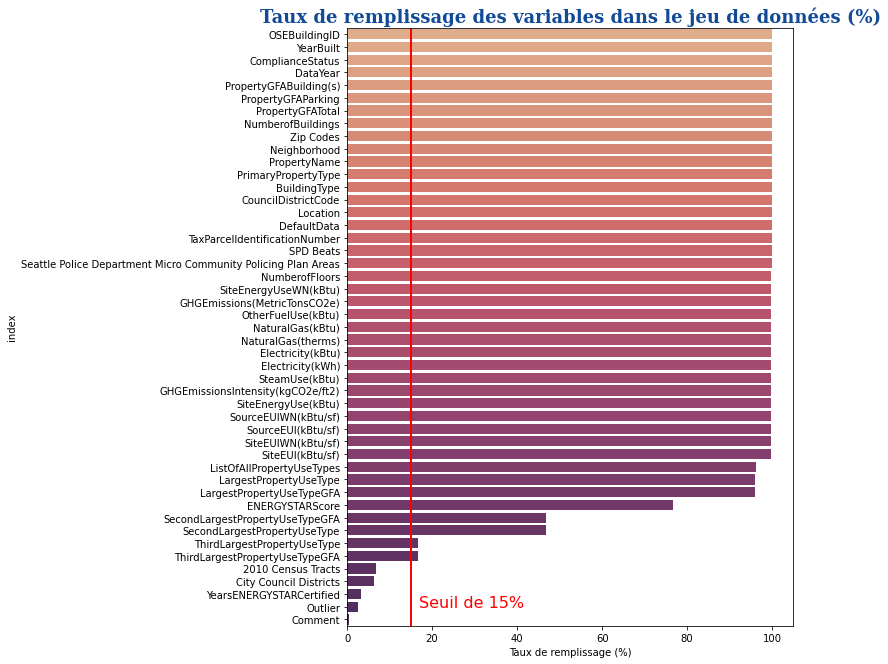

In [31]:
#  Evaluation de la nécessité de supprimer des colonnes sur un critère de remplissage
visu_remplissage_colonnes(building_2015, 15)

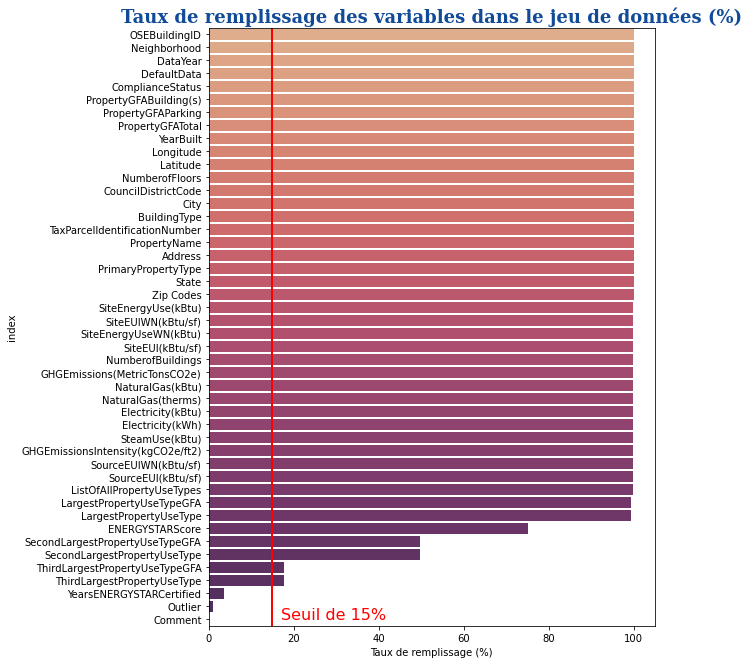

In [32]:
#  Evaluation de la nécessité de supprimer des colonnes sur un critère de remplissage
visu_remplissage_colonnes(building_2016, 15)

Il n'y a pas de raison de se basser sur un critère de remplissage pour supprimer des colonnes, hormis éventuellement les toutes dernière colonnes. Ces colonnes seront traitées par la suite.

## Nettoyage des colonnes

### Information sur la localisation
Les adresses précises ne devraient pas avoir d'impact sur les emissions de Co2 et/ou la consommation d'energie ==> je garde uniquement l'info sur le quartier (neighborhood)

- 2015 : toutes les infos de localisation sont dans les variables Location, CouncilDistrictCode, City Council Districts et Zip Codes
- 2016 : les infos de localisation sont dans les variables Address, City, State, CouncilDistrictCode, Latitude, Longitude et Zip codes

In [33]:
# Statistiques par quartier
stat_quartiers = building_2015.pivot_table(index='Neighborhood', 
                                           values=['GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)'],
                                           aggfunc=[np.count_nonzero, np.min, np.max, np.mean, np.median, np.std]
                                          )

stat_quartiers

count_nonzero                      \
                      GHGEmissions(MetricTonsCO2e) SiteEnergyUse(kBtu)   
Neighborhood                                                             
BALLARD                                        130                 130   
CENTRAL                                        131                 131   
DELRIDGE                                        85                  85   
DOWNTOWN                                       576                 576   
EAST                                           444                 444   
GREATER DUWAMISH                               369                 369   
LAKE UNION                                     249                 249   
MAGNOLIA / QUEEN ANNE                          420                 420   
NORTH                                          188                 188   
NORTHEAST                                      259                 259   
NORTHWEST                                      226                 226   
SOUTHEAST                                       96                  96   
SOUTHWEST                                      165                 165   

                                              amin                      \
                      GHGEmissions(MetricTonsCO2e) SiteEnergyUse(kBtu)   
Neighborhood                                                             
BALLARD                                       1.24            178243.0   
CENTRAL                                       0.35             56493.0   
DELRIDGE                                      2.01            288191.0   
DOWNTOWN                                      0.00                 0.0   
EAST                                          0.89             82824.0   
GREATER DUWAMISH                              0.12             17150.0   
LAKE UNION                                    1.15            165472.0   
MAGNOLIA / QUEEN ANNE                         0.08             11441.0   
NORTH                                         0.80            114892.0   
NORTHEAST                                     0.85            122156.0   
NORTHWEST                                     1.61            230365.0   
SOUTHEAST                                     0.64             91996.0   
SOUTHWEST                                     1.06            151798.0   

                                              amax                      \
                      GHGEmissions(MetricTonsCO2e) SiteEnergyUse(kBtu)   
Neighborhood                                                             
BALLARD                                    1874.42          63362516.0   
CENTRAL                                    4725.43         137635696.0   
DELRIDGE                                    839.79          37430780.0   
DOWNTOWN                                   2937.83         284867168.0   
EAST                                      11824.89         295812640.0   
GREATER DUWAMISH                           1236.93          78272488.0   
LAKE UNION                                 4045.53         136241424.0   
MAGNOLIA / QUEEN ANNE                      4829.86         157606480.0   
NORTH                                       765.56          29067292.0   
NORTHEAST                                  8046.70         251191824.0   
NORTHWEST                                  3044.63          94178648.0   
SOUTHEAST                                   698.11          21069722.0   
SOUTHWEST                                  1858.84          45494324.0   

                                              mean                      \
                      GHGEmissions(MetricTonsCO2e) SiteEnergyUse(kBtu)   
Neighborhood                                                             
BALLARD                                  77.473615        3.371426e+06   
CENTRAL                                  91.660769        3.691005e+06   
DELRIDGE                                 65.667059        3.226518e+06   
DOWNTOWN                              

In [34]:
def suppression_colonnes(df, liste_colonnes, liste_complete_colonnes_supp):
    """"
    suppression des colonnes dans un dataframe à partir d'une liste
    
    retourne : df_cleaned = df où les colonnes ont été supprimées
               liste_all_columns_cleaned = liste de toutes les colonnes nettoyées (ajout à precedente liste si existante)
    """
    liste_all_columns_cleaned = liste_complete_colonnes_supp
    liste_all_columns_cleaned.extend(liste_colonnes)
    
    df_cleaned = df.drop(liste_colonnes, axis=1)
    
    return df_cleaned, liste_all_columns_cleaned
    

In [35]:
liste_colonnes_supp_2015 = []
liste_2015 = ['Location', 'CouncilDistrictCode', 'City Council Districts', 'Zip Codes']

building_2015_cleaned, liste_colonnes_supp_2015 = suppression_colonnes(building_2015, liste_2015, liste_colonnes_supp_2015)
print(liste_colonnes_supp_2015)
building_2015_cleaned.head(2)

['Location', 'CouncilDistrictCode', 'City Council Districts', 'Zip Codes']


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,DOWNTOWN,1927,1,12.0,...,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,DOWNTOWN,1996,1,11.0,...,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,31.0


In [36]:
liste_colonnes_supp_2016 = []
liste_2016 = ['Address', 'City', 'State', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'Zip Codes']

building_2016_cleaned, liste_colonnes_supp_2016 = suppression_colonnes(building_2016, liste_2016, liste_colonnes_supp_2016)
print(liste_colonnes_supp_2016)
building_2016_cleaned.head(2)

['Address', 'City', 'State', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'Zip Codes']


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,DOWNTOWN,1927,1.0,12,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,DOWNTOWN,1996,1.0,11,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


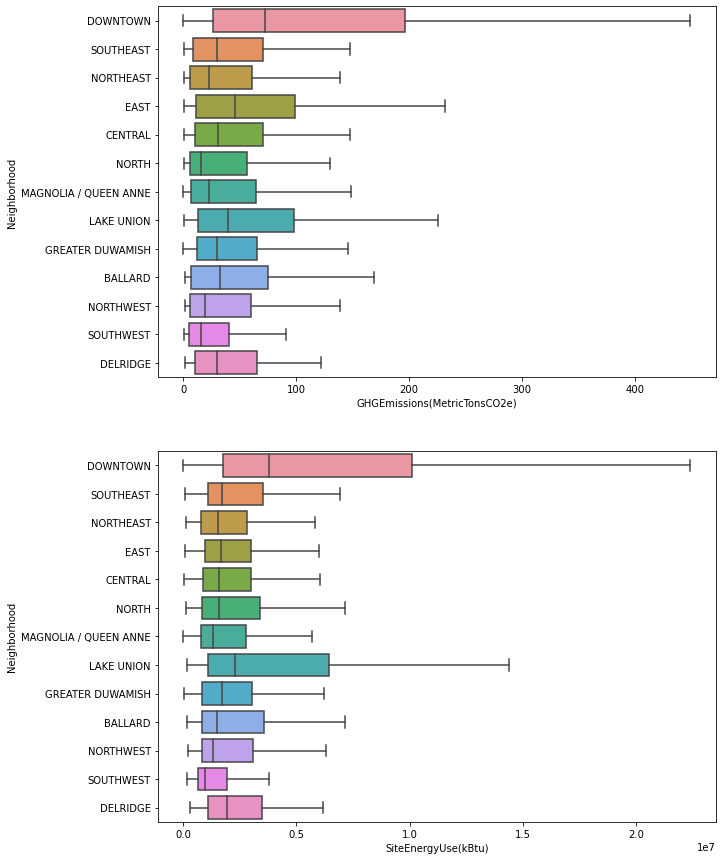

In [37]:
# Preparation des données
dataBox = building_2015_cleaned[['GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)', 'Neighborhood']]

fig = plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
sns.boxplot(data=dataBox, x='GHGEmissions(MetricTonsCO2e)', y='Neighborhood', showfliers = False)
plt.subplot(2,1,2)
sns.boxplot(data=dataBox, x='SiteEnergyUse(kBtu)', y='Neighborhood', showfliers = False);


In [38]:
# identification des colonnes présentes uniquement dans un des deux fichiers
liste_col_uniquement_en_2015 = []
for col_2015 in building_2015_cleaned.columns:
    if (col_2015 in building_2016_cleaned.columns) == False:
        liste_col_uniquement_en_2015.append(col_2015)
        print("la colonne {} est présente dans le fichier building 2015 mais pas dans building_2016".format(col_2015))

print("\n")
liste_col_uniquement_en_2016 = []
for col_2016 in building_2016_cleaned.columns:
    if (col_2016 in building_2015_cleaned.columns) == False:
        liste_col_uniquement_en_2016.append(col_2016)
        print("la colonne {} est présente dans le fichier building 2016 mais pas dans building_2015".format(col_2016))


la colonne OtherFuelUse(kBtu) est présente dans le fichier building 2015 mais pas dans building_2016
la colonne 2010 Census Tracts est présente dans le fichier building 2015 mais pas dans building_2016
la colonne Seattle Police Department Micro Community Policing Plan Areas est présente dans le fichier building 2015 mais pas dans building_2016
la colonne SPD Beats est présente dans le fichier building 2015 mais pas dans building_2016




seul le fichier 2015 a des colonnes en plus.

### Variables non nécessaires pour l'étude

In [39]:
# SPD beats correspond au quartiers dans lesquels sont affectés les policiers.
building_2015_cleaned['SPD Beats'].unique().shape

(52,)

In [40]:
# quartiers de recensement
building_2015_cleaned['2010 Census Tracts'].unique()

array([ nan, 124., 116., 123., 134., 131., 127., 117., 129., 135., 119.,
       118., 122., 125.])

In [41]:
building_2015_cleaned['Seattle Police Department Micro Community Policing Plan Areas'].unique()

array([14., 56., 30., 60., 19., 35., 29., 50., 61., 53., 58., 33.,  4.,
       42.,  5., 36.,  9.,  1.,  6., 54.,  8., 48., 38., 11., 46., 20.,
       27., 45., 55., 52., 32., 40., 23., 22.,  3., 15., 51., 28.,  7.,
       37., 49., 57., 13., 59., 24., 25., 41., 39., 34., 17., 10., 43.,
       12., 47.,  2., 16., 44., 31., 18., 26., 21., nan])

In [42]:
building_2015_cleaned['DefaultData'].unique()

array(['No', 'Yes', nan], dtype=object)

In [43]:
building_2015_cleaned['Comment'].unique()

array([nan,
       'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.',
       "Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.",
       "One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re",
       'Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu',
       'Construction completed in mid 2015. The building was unoccupied for most of 2015.',
 

In [44]:
building_2015_cleaned['ComplianceStatus'].unique()

array(['Compliant', 'Not Compliant'], dtype=object)

In [45]:
# liste des colonnes non necessaires
liste_2015 = ['SPD Beats', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas',
              'DefaultData', 'ComplianceStatus', 'DataYear', 'TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified', 
              'Comment'
             ]

building_2015_cleaned, liste_colonnes_supp_2015 = suppression_colonnes(building_2015_cleaned, liste_2015, liste_colonnes_supp_2015)
print(liste_colonnes_supp_2015)
building_2015_cleaned.columns

['Location', 'CouncilDistrictCode', 'City Council Districts', 'Zip Codes', 'SPD Beats', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'DefaultData', 'ComplianceStatus', 'DataYear', 'TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified', 'Comment']


Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Outlier'],
      dtype='object')

In [46]:
# identification des colonnes présentes uniquement dans un des deux fichiers
liste_col_uniquement_en_2015 = []
for col_2015 in building_2015_cleaned.columns:
    if (col_2015 in building_2016_cleaned.columns) == False:
        liste_col_uniquement_en_2015.append(col_2015)
        print("la colonne {} est présente dans le fichier building 2015 mais pas dans building_2016".format(col_2015))

print("\n")
liste_col_uniquement_en_2016 = []
for col_2016 in building_2016_cleaned.columns:
    if (col_2016 in building_2015_cleaned.columns) == False:
        liste_col_uniquement_en_2016.append(col_2016)
        print("la colonne {} est présente dans le fichier building 2016 mais pas dans building_2015".format(col_2016))

la colonne OtherFuelUse(kBtu) est présente dans le fichier building 2015 mais pas dans building_2016


la colonne DataYear est présente dans le fichier building 2016 mais pas dans building_2015
la colonne TaxParcelIdentificationNumber est présente dans le fichier building 2016 mais pas dans building_2015
la colonne YearsENERGYSTARCertified est présente dans le fichier building 2016 mais pas dans building_2015
la colonne DefaultData est présente dans le fichier building 2016 mais pas dans building_2015
la colonne Comment est présente dans le fichier building 2016 mais pas dans building_2015
la colonne ComplianceStatus est présente dans le fichier building 2016 mais pas dans building_2015


### Variables susceptible de sur-entrainer les modèle (data leakage)

variables cible :
- Emission de CO2 : GHGEmissions(MetricTonsCO2e)
- Conso énergie : SiteEnergyUse(kBtu)

perspective d'amélioration : estimer le mix energétique à partir de SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu) et OtherFuelUse(kBtu)

In [47]:
# variables issues des relevés de consommation d'énergie, hors variables cible pour le ML
leakage = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 
           'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 
           'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
           'OtherFuelUse(kBtu)']

building_2015_cleaned, liste_colonnes_supp_2015 = suppression_colonnes(building_2015_cleaned, leakage, liste_colonnes_supp_2015)
print(liste_colonnes_supp_2015)
building_2015_cleaned.columns

['Location', 'CouncilDistrictCode', 'City Council Districts', 'Zip Codes', 'SPD Beats', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'DefaultData', 'ComplianceStatus', 'DataYear', 'TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified', 'Comment', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)']


Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'Outlier'],
      dtype='object')

In [48]:
leakage_2016 = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 
           'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 
           'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']
building_2016_cleaned, liste_colonnes_supp_2016 = suppression_colonnes(building_2016_cleaned, leakage_2016, liste_colonnes_supp_2016)
print(liste_colonnes_supp_2016)
building_2016_cleaned.columns

['Address', 'City', 'State', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'Zip Codes', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']


Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'DefaultData', 'Comment',
       'ComplianceStatus', 'Outlier', 'GHGEmissions(MetricTonsCO2e)'],
      dtype='object')

# Choix de ne garder que 2015 pour faire l'apprentissage

## Selection des batiments non destinés à l'habitation

In [49]:
building_2015_cleaned['ListOfAllPropertyUseTypes'].str.contains('family').value_counts()

True     1632
False    1581
Name: ListOfAllPropertyUseTypes, dtype: int64

In [50]:
building_2015.shape

(3340, 47)

cela revient à supprimer 1632 batiments.

In [51]:
data = building_2015_cleaned[building_2015_cleaned['ListOfAllPropertyUseTypes'].str.contains('family') == False]
data.shape

(1581, 22)

In [52]:
data['BuildingType'].value_counts()

NonResidential          1370
SPS-District K-12         95
Nonresidential COS        68
Campus                    20
Multifamily LR (1-4)      18
Multifamily MR (5-9)       6
Multifamily HR (10+)       4
Name: BuildingType, dtype: int64

In [53]:
data[data["BuildingType"].str.contains('family')][['BuildingType', 'ListOfAllPropertyUseTypes', 
                                                   'PrimaryPropertyType', 'SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType'
                                                  ]]

,BuildingType,ListOfAllPropertyUseTypes,PrimaryPropertyType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
888,Multifamily HR (10+),Other,Other,NaN,NaN
979,Multifamily LR (1-4),"Parking, Senior Care Community",Senior Care Community,Parking,NaN
1089,Multifamily LR (1-4),Office,Small- and Mid-Sized Office,NaN,NaN
1164,Multifamily HR (10+),"Parking, Senior Care Community",Senior Care Community,Parking,NaN
1356,Multifamily LR (1-4),"Parking, Senior Care Community",Senior Care Community,Parking,NaN
1459,Multifamily LR (1-4),"Other, Parking",Other,Parking,NaN
1666,Multifamily MR (5-9),"Office, Senior Care Community",Senior Care Community,Office,NaN
1679,Multifamily MR (5-9),Senior Care Community,Senior Care Community,NaN,NaN
1783,Multifamily MR (5-9),"Parking, Senior Care Community",Senior Care Community,Parking,NaN
1902,Multifamily LR (1-4),"Restaurant, Senior Care Community",Senior Care Community,Restaurant,NaN


Il en reste 24 qui n'étaient pas identifiés dans la variable ListOfAllPropertyUseTypes ==> Suppression

In [54]:
print('suppression de ',
     len(data[data['BuildingType'].str.contains('family') == True]), 'lignes')
data = data.drop(data[data['BuildingType'].str.contains('family') == True].index)
data.shape

suppression de  28 lignes


(1553, 22)

In [55]:
pourcent_NA_df(data)

Il y a 82.12% valeurs renseignées (soit 17.88 % de valeurs manquantes) dans l'intégralité du df


## Gestion des outliers

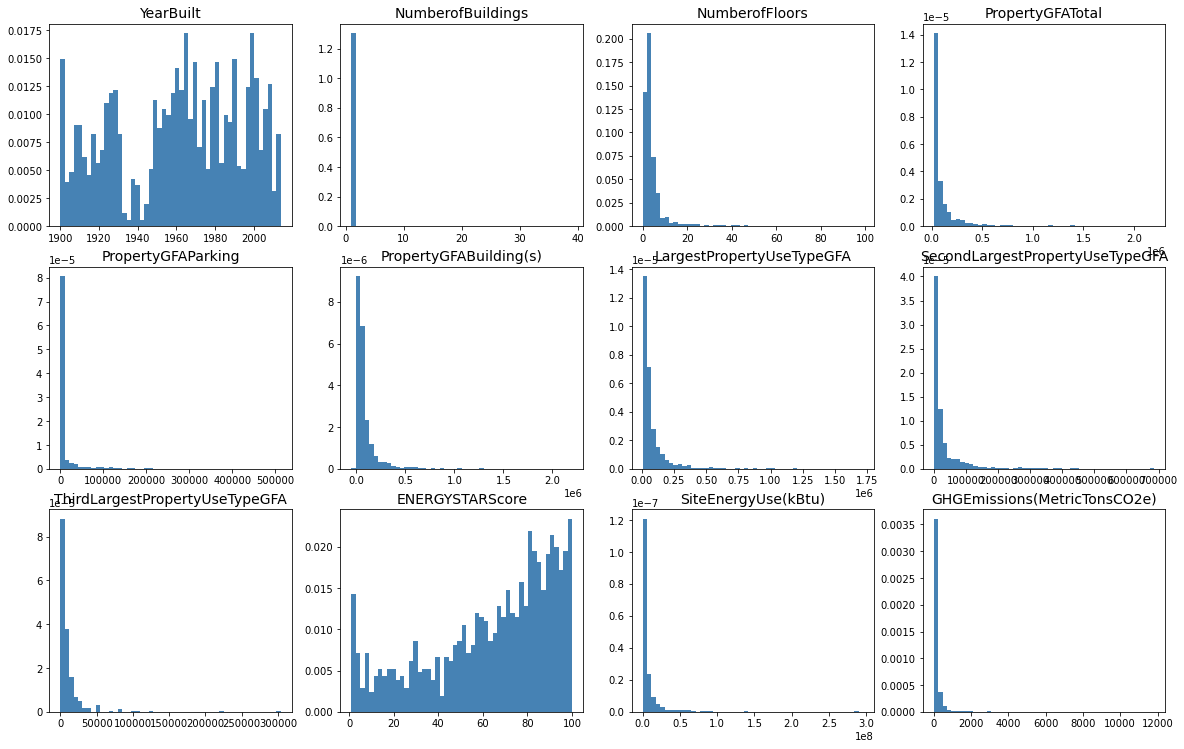

In [56]:
# selection données quantitatives
data_qtt = data.select_dtypes(['float64', 'int64'])

fig = plt.figure(figsize=(20, 35))
for feat_idx in range(data_qtt.shape[1]):
    ax = fig.add_subplot(8,4, (feat_idx+1))
    h = ax.hist(data_qtt.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data_qtt.columns[feat_idx], fontsize=14)

In [57]:
data.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
count,1553.000000,1553.000000,1545.000000,1.553000e+03,1553.000000,1.553000e+03,1.549000e+03,776.000000,299.000000,1060.000000,1.546000e+03,1546.000000
mean,1961.360592,1.065679,4.092557,1.109443e+05,13336.462975,9.760784e+04,9.245750e+04,34916.764175,11873.622074,64.361321,7.647955e+06,167.867173
std,32.462469,1.130442,6.597209,1.930086e+05,44918.963161,1.687239e+05,1.614434e+05,65963.506729,26088.940111,28.322849,1.919421e+07,573.596040
min,1900.000000,1.000000,0.000000,2.000000e+04,-2.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,1930.000000,1.000000,1.000000,2.950800e+04,0.000000,2.853100e+04,2.558000e+04,5112.750000,2429.000000,47.750000,1.211808e+06,19.360000
50%,1965.000000,1.000000,2.000000,4.866000e+04,0.000000,4.658000e+04,4.305000e+04,12011.500000,5615.000000,72.000000,2.455496e+06,47.875000
75%,1988.000000,1.000000,4.000000,1.029300e+05,0.000000,9.339700e+04,8.913100e+04,30044.250000,11689.500000,88.000000,6.792741e+06,137.210000
max,2014.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,2.958126e+08,11824.890000


In [58]:
def outlier_sup(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    print("{} : lignes présentant une valeur supérieure à Q3+1.5IQR = {}".format(col, Q3 + 1.5 * IQR))
    print(df[df[col] > Q3+1.5*IQR].shape)

#### number of buildings

In [59]:
outlier_sup(data, 'NumberofBuildings')

NumberofBuildings : lignes présentant une valeur supérieure à Q3+1.5IQR = 1.0
(12, 22)


In [60]:
data[data['NumberofBuildings'] > 1]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Outlier
127,211,Campus,College/University,NORTH SEATTLE COMMUNITY COLLEGE CAMPUS MASTER ID,NORTHWEST,1970,11,2.0,694072,111625,...,College/University,667265.0,NaN,NaN,NaN,NaN,NaN,37117212.0,440.31,NaN
161,261,Campus,Large Office,BOEING SOUTH PARK CAMPUS REPORT,GREATER DUWAMISH,1980,16,2.0,334368,31874,...,Office,260000.0,Laboratory,78404.0,Parking,0.0,NaN,52273792.0,706.26,NaN
195,315,Campus,Other,PORT OF SEATTLE BELL HARBOR COMPLEX & CONFER...,DOWNTOWN,1995,4,3.0,215476,0,...,Other,217088.0,NaN,NaN,NaN,NaN,NaN,25377650.0,659.56,NaN
341,477,Campus,Other,FHCRC - Weintraub/Hutchinson/Thomas Bldgs Campus,LAKE UNION,1997,3,5.0,535947,195283,...,Other,535947.0,Parking,103983.0,NaN,NaN,NaN,136241424.0,4045.53,NaN
543,730,NonResidential,Other,KING COUNTY METRO TRANSIT RYERSON BASE,GREATER DUWAMISH,1986,3,2.0,63644,0,...,Other - Public Services,65700.0,Parking,0.0,NaN,NaN,NaN,7256842.0,160.30,NaN
1508,22062,Campus,College/University,SEATTLE UNIVERSITY (MAIN CAMPUS),EAST,1939,39,2.0,2200000,0,...,College/University,1719643.0,Parking,318960.0,NaN,NaN,NaN,115080128.0,3232.23,NaN
1944,23846,NonResidential,Small- and Mid-Sized Office,DIAMOND BUILDING,DOWNTOWN,1979,2,3.0,34030,0,...,Office,34030.0,NaN,NaN,NaN,NaN,49.0,1757194.0,20.95,NaN
2015,24086,Campus,Other,KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BAS...,GREATER DUWAMISH,1991,10,NaN,180796,0,...,Other,230970.0,Parking,0.0,NaN,NaN,NaN,29939196.0,818.66,NaN
2936,27389,NonResidential,Small- and Mid-Sized Office,LESCHI LAKE CENTER,CENTRAL,1956,6,2.0,75868,0,...,Office,50379.0,Restaurant,12622.0,Retail Store,6662.0,NaN,3075425.0,21.44,NaN
3209,49705,Nonresidential COS,Other,MAGNUSON PARK CAMPUS,NORTHEAST,1929,7,NaN,502030,0,...,Other - Recreation,564258.0,NaN,NaN,NaN,NaN,NaN,17290816.0,472.56,NaN


Pas d'outlier identifié sur cette variable

#### Number of Floors

In [61]:
outlier_sup(data, 'NumberofFloors')

NumberofFloors : lignes présentant une valeur supérieure à Q3+1.5IQR = 8.5
(122, 22)


In [62]:
data[data['NumberofFloors'] > 8.5]['NumberofFloors'].describe()

count    122.000000
mean      20.836066
std       14.631202
min        9.000000
25%       11.000000
50%       15.000000
75%       24.750000
max       99.000000
Name: NumberofFloors, dtype: float64

In [63]:
data[data['NumberofFloors'] == 99]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Outlier
1371,21611,NonResidential,Worship Facility,CHINESE BAPTIST CHURCH,GREATER DUWAMISH,1977,1,99.0,21948,0,...,Worship Facility,21948.0,NaN,NaN,NaN,NaN,54.0,318205.0,2.22,NaN


Un outlier identifié

In [64]:
print('suppression de ',
     len(data[data['NumberofFloors'] == 99]), 'lignes')
data = data.drop(data[data['NumberofFloors'] == 99].index)
data.shape

suppression de  1 lignes


(1552, 22)

In [65]:
data['NumberofFloors'].describe()

count    1544.000000
mean        4.031088
std         6.140846
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        76.000000
Name: NumberofFloors, dtype: float64

In [66]:
data[data['NumberofFloors'] > 40]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Outlier
2,3,NonResidential,Hotel,WESTIN HOTEL,DOWNTOWN,1969,1,41.0,961990,0,...,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,73130656.0,2061.48,NaN
223,345,NonResidential,Large Office,999 THIRD AVE,DOWNTOWN,1983,1,47.0,1323055,0,...,Office,1011135.0,Parking,272682.0,Restaurant,37595.0,93.0,45074876.0,321.72,NaN
224,346,NonResidential,Large Office,1000 2ND AVENUE BUILDING,DOWNTOWN,1986,1,41.0,589921,129432,...,Office,485296.0,Parking,92787.0,Pre-school/Daycare,10290.0,82.0,26208138.0,182.71,NaN
231,353,NonResidential,Large Office,SAFECO PLAZA / 1001 FOURTH AVENUE,DOWNTOWN,1969,1,49.0,1123435,368980,...,Office,808980.0,Parking,232248.0,Other,30329.0,88.0,47148456.0,704.76,NaN
235,357,Nonresidential COS,Large Office,SEATTLE MUNICIPAL TOWER,DOWNTOWN,1990,1,63.0,1195387,159600,...,Office,1187924.0,Parking,159599.0,Other,18656.0,82.0,64715652.0,452.16,NaN
256,383,NonResidential,Large Office,SMITH TOWER,DOWNTOWN,1912,1,42.0,304346,0,...,Office,277397.0,Retail Store,8429.0,Other - Restaurant/Bar,7518.0,82.0,19609472.0,597.76,NaN
261,388,NonResidential,Large Office,RAINIER TOWER,DOWNTOWN,1976,1,42.0,635824,0,...,Office,718473.0,Parking,40000.0,Restaurant,19671.0,56.0,56762408.0,395.71,NaN
271,399,NonResidential,Large Office,WASH MUTUAL TOWER (1201 THIRD AVE),DOWNTOWN,1988,1,55.0,1400000,285000,...,Office,1021940.0,Parking,264481.0,Other,123433.0,94.0,51625548.0,569.61,NaN
274,402,NonResidential,Large Office,US BANK CENTRE,DOWNTOWN,1989,1,46.0,1536606,512608,...,Office,1002403.0,Parking,377046.0,Other,53116.0,90.0,55813996.0,530.70,NaN
293,422,NonResidential,Large Office,TWO UNION SQUARE,DOWNTOWN,1989,1,56.0,1605578,389860,...,Office,1314475.0,Parking,389860.0,Other,30744.0,97.0,48342560.0,496.99,NaN


In [67]:
data[data['NumberofFloors'].isna()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Outlier
2015,24086,Campus,Other,KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BAS...,GREATER DUWAMISH,1991,10,NaN,180796,0,...,Other,230970.0,Parking,0.0,NaN,NaN,NaN,29939196.0,818.66,NaN
3171,40028,NonResidential,Non-Refrigerated Warehouse,"SAND POINT BUILDING 5A,5B,5C,5D",NORTHEAST,1940,1,NaN,384772,0,...,Non-Refrigerated Warehouse,349953.0,Office,63872.0,NaN,NaN,65.0,15411831.0,406.74,NaN
3172,40031,NonResidential,Medical Office,SAND POINT BUILDING 25,NORTHEAST,1960,1,NaN,30287,0,...,Medical Office,31843.0,NaN,NaN,NaN,NaN,56.0,1976647.0,27.88,NaN
3173,40034,NonResidential,Medical Office,SAND POINT BUILDING 29,NORTHEAST,1960,1,NaN,21931,0,...,Medical Office,28000.0,NaN,NaN,NaN,NaN,21.0,3732139.0,137.63,NaN
3193,43948,Nonresidential COS,Other,GEORGETOWN STEAM PLANT,GREATER DUWAMISH,1906,1,NaN,39212,0,...,Other,39212.0,NaN,NaN,NaN,NaN,NaN,773013.0,5.39,NaN
3209,49705,Nonresidential COS,Other,MAGNUSON PARK CAMPUS,NORTHEAST,1929,7,NaN,502030,0,...,Other - Recreation,564258.0,NaN,NaN,NaN,NaN,NaN,17290816.0,472.56,NaN
3311,49958,Nonresidential COS,Other,FIRST HILL STREET CAR MAINTENANCE,GREATER DUWAMISH,2014,1,NaN,20993,0,...,"Repair Services (Vehicle, Shoe, Locksmith, etc)",20983.0,NaN,NaN,NaN,NaN,NaN,912558.0,12.28,NaN
3313,49966,NonResidential,Other,SMILOW RAINIER VISTA BOYS & GIRLS CLUB,SOUTHEAST,2009,1,NaN,40265,0,...,Pre-school/Daycare,40265.0,NaN,NaN,NaN,NaN,NaN,1957356.0,42.40,NaN


suppression des lignes sans information sur le nombre d'étages

In [68]:
print('suppression de ',
     len(data[data['NumberofFloors'].isna()]), 'lignes')
data = data.drop(data[data['NumberofFloors'].isna()].index)
data.shape

suppression de  8 lignes


(1544, 22)

#### PropertyGFATotal

In [69]:
outlier_sup(data, 'PropertyGFATotal')

PropertyGFATotal : lignes présentant une valeur supérieure à Q3+1.5IQR = 212886.375
(180, 22)


In [70]:
data[data['PropertyGFATotal'] > 212886.375]['PropertyGFATotal'].describe()

count    1.800000e+02
mean     4.997237e+05
std      3.674316e+05
min      2.132830e+05
25%      2.759200e+05
50%      3.449505e+05
75%      5.426978e+05
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64

Text(0.5, 1.0, 'PropertyGFATotal zoom données > Q3 + 1.5 IQR')

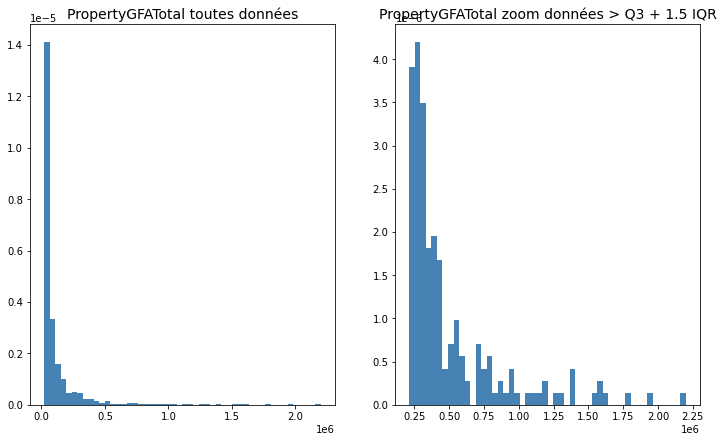

In [71]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2, 1)
ax1.hist(data['PropertyGFATotal'], bins=50, color='steelblue', density=True, edgecolor='none');
ax1.set_title('PropertyGFATotal toutes données', fontsize=14)
ax2 = fig.add_subplot(1,2, 2)
ax2.hist(data[data['PropertyGFATotal'] > 212886.375]['PropertyGFATotal'], 
         bins=50, color='steelblue', density=True, edgecolor='none');
ax2.set_title('PropertyGFATotal zoom données > Q3 + 1.5 IQR', fontsize=14)

In [72]:
data[data['PropertyGFATotal'] > 1.5e+06]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Outlier
154,245,NonResidential,Other,CENTURYLINK FIELD-Stadium,GREATER DUWAMISH,1999,1,6.0,1585960,327680,...,Other - Entertainment/Public Assembly,1585960.0,Parking,0.0,NaN,NaN,NaN,59991984.0,834.11,NaN
274,402,NonResidential,Large Office,US BANK CENTRE,DOWNTOWN,1989,1,46.0,1536606,512608,...,Office,1002403.0,Parking,377046.0,Other,53116.0,90.0,55813996.0,530.70,NaN
293,422,NonResidential,Large Office,TWO UNION SQUARE,DOWNTOWN,1989,1,56.0,1605578,389860,...,Office,1314475.0,Parking,389860.0,Other,30744.0,97.0,48342560.0,496.99,NaN
492,659,NonResidential,Large Office,RUSSELL INVESTMENTS CENTER,DOWNTOWN,2005,1,42.0,1592914,297457,...,Office,914832.0,Parking,348788.0,Financial Office,303910.0,96.0,58041572.0,500.93,NaN
581,775,NonResidential,Large Office,COLUMBIA CENTER,DOWNTOWN,1985,1,76.0,1952220,319400,...,Office,1680937.0,Parking,319368.0,NaN,NaN,84.0,94560088.0,834.96,NaN
621,828,NonResidential,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,EAST,1994,1,14.0,1765970,0,...,Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,59.0,286685536.0,11824.89,NaN
1508,22062,Campus,College/University,SEATTLE UNIVERSITY (MAIN CAMPUS),EAST,1939,39,2.0,2200000,0,...,College/University,1719643.0,Parking,318960.0,NaN,NaN,NaN,115080128.0,3232.23,NaN


Pas de données aberrante identifiée pour cette variable mais des valeurs très élevées (sup à 1.5 * 10e6 sf) qui risquent de fausser les modélisations ==> suppression

In [73]:
print('suppression de ',
     len(data[data['PropertyGFATotal'] > 1.5e+06]), 'lignes')
data = data.drop(data[data['PropertyGFATotal'] > 1.5e+06].index)
data.shape

suppression de  7 lignes


(1537, 22)

#### GFA : cohérence des différentes variables entre elles
- GFA total doit être supérieur ou egal a GFA parking + GFA buildings

et
- GFA total doit être superieur ou egal GFA  primary use / secondary Use / third use

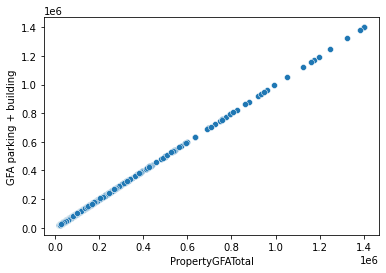

In [74]:
data['GFA parking + building'] = data['PropertyGFAParking'] + data['PropertyGFABuilding(s)']
sns.scatterplot(x='PropertyGFATotal', y='GFA parking + building', data=data);

Pas d'incohérence détectée

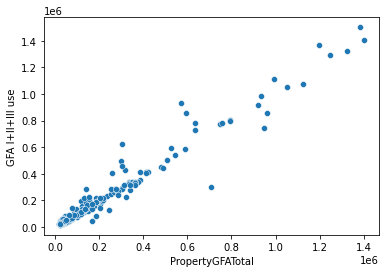

In [75]:
data['GFA I+II+III use'] = data['LargestPropertyUseTypeGFA'] + data['SecondLargestPropertyUseTypeGFA'] + data['ThirdLargestPropertyUseTypeGFA']
sns.scatterplot(x='PropertyGFATotal', y='GFA I+II+III use', data=data);

In [76]:
# suppression des lignes où GFA I+II+III use > 1.01*PropertyGFATotal
print('suppression de ',
     len(data[data['GFA I+II+III use'] > 1.01*data['PropertyGFATotal']]), 'lignes')
data = data.drop(data[data['GFA I+II+III use'] > 1.01*data['PropertyGFATotal']].index)
data.shape

suppression de  86 lignes


(1451, 24)

In [77]:
# suppression des lignes où LargestPropertyUseTypeGFA > 1.01*PropertyGFATotal
print('suppression de ',
     len(data[data['LargestPropertyUseTypeGFA'] > 1.01*data['PropertyGFATotal']]), 'lignes')
data = data.drop(data[data['LargestPropertyUseTypeGFA'] > 1.01*data['PropertyGFATotal']].index)
data.shape


suppression de  147 lignes


(1304, 24)

In [78]:
# suppression des lignes où SecondLargestPropertyUseTypeGFA > 1.01*PropertyGFATotal
print('suppression de ',
     len(data[data['SecondLargestPropertyUseTypeGFA'] > 1.01*data['PropertyGFATotal']]), 'lignes')
data = data.drop(data[data['SecondLargestPropertyUseTypeGFA'] > 1.01*data['PropertyGFATotal']].index)
data.shape


suppression de  0 lignes


(1304, 24)

In [79]:
# suppression des lignes où ThirdLargestPropertyUseTypeGFA > 1.01*PropertyGFATotal
print('suppression de ',
     len(data[data['ThirdLargestPropertyUseTypeGFA'] > 1.01*data['PropertyGFATotal']]), 'lignes')
data = data.drop(data[data['ThirdLargestPropertyUseTypeGFA'] > 1.01*data['PropertyGFATotal']].index)
data.shape


suppression de  0 lignes


(1304, 24)

In [80]:
# Supression des lignes ou GFA < 0
print('suppression de ',
     len(data[data['PropertyGFAParking'] < 0]), 'lignes')
data = data.drop(data[data['PropertyGFAParking'] < 0].index)
data.shape

suppression de  1 lignes


(1303, 24)

In [81]:
# Supression des lignes ou GFA < 0
print('suppression de ',
     len(data[data['PropertyGFABuilding(s)'] < 0]), 'lignes')
data = data.drop(data[data['PropertyGFABuilding(s)'] < 0].index)
data.shape

suppression de  1 lignes


(1302, 24)

In [82]:
data.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GFA parking + building,GFA I+II+III use
count,1302.000000,1302.000000,1302.000000,1.302000e+03,1302.000000,1.302000e+03,1.298000e+03,641.000000,210.000000,887.000000,1.297000e+03,1297.000000,1.302000e+03,2.100000e+02
mean,1960.445469,1.024578,3.754992,9.707106e+04,12311.593702,8.475947e+04,7.755513e+04,26981.915757,9121.866667,63.959414,6.401974e+06,133.538635,9.707106e+04,1.441348e+05
std,32.835200,0.391310,5.025136,1.428370e+05,40563.806272,1.216888e+05,1.145778e+05,48462.363817,14560.536030,28.563788,1.546789e+07,386.056030,1.428370e+05,2.126624e+05
min,1900.000000,1.000000,0.000000,2.000000e+04,0.000000,1.092500e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000e+00,0.000000,2.000000e+04,1.420900e+04
25%,1929.000000,1.000000,1.000000,2.884500e+04,0.000000,2.811325e+04,2.431925e+04,5000.000000,2422.000000,46.500000,1.137520e+06,18.580000,2.884500e+04,3.121950e+04
50%,1965.000000,1.000000,2.000000,4.776750e+04,0.000000,4.591200e+04,4.067150e+04,10638.000000,4980.000000,72.000000,2.295845e+06,45.220000,4.776750e+04,6.391350e+04
75%,1988.000000,1.000000,4.000000,9.836675e+04,0.000000,8.896225e+04,8.200800e+04,26900.000000,9940.000000,87.000000,6.155789e+06,124.540000,9.836675e+04,1.634105e+05
max,2014.000000,11.000000,55.000000,1.400000e+06,440185.000000,1.400000e+06,1.172127e+06,686750.000000,123433.000000,100.000000,2.848672e+08,8046.700000,1.400000e+06,1.409854e+06


In [83]:
# nettoyage des variables temporaires
data = data.drop(['GFA parking + building', 'GFA I+II+III use'], axis=1)

#### ENERGYSTARScore

In [84]:
outlier_sup(data, 'ENERGYSTARScore')

ENERGYSTARScore : lignes présentant une valeur supérieure à Q3+1.5IQR = 147.75
(0, 22)


In [85]:
data['ENERGYSTARScore'].describe()

count    887.000000
mean      63.959414
std       28.563788
min        1.000000
25%       46.500000
50%       72.000000
75%       87.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

Pas d'outlier détecté ni de valeur aberrante

#### Energie utilisée

In [86]:
outlier_sup(data, 'SiteEnergyUse(kBtu)')

SiteEnergyUse(kBtu) : lignes présentant une valeur supérieure à Q3+1.5IQR = 13683192.5
(136, 22)


In [87]:
data['SiteEnergyUse(kBtu)'].describe()

count    1.297000e+03
mean     6.401974e+06
std      1.546789e+07
min      0.000000e+00
25%      1.137520e+06
50%      2.295845e+06
75%      6.155789e+06
max      2.848672e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [88]:
data[data['SiteEnergyUse(kBtu)'] > 13683192.5]['SiteEnergyUse(kBtu)'].describe()

count    1.360000e+02
mean     3.422236e+07
std      3.674498e+07
min      1.372071e+07
25%      1.763352e+07
50%      2.307214e+07
75%      3.715714e+07
max      2.848672e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [89]:
data[data['SiteEnergyUse(kBtu)'] > 1e8][['PropertyName', 'PropertyGFATotal', 'SiteEnergyUse(kBtu)']]

,PropertyName,PropertyGFATotal,SiteEnergyUse(kBtu)
123,SEATTLE CHILDREN'S HOSPITAL (MAIN CAMPUS),879000,251191824.0
167,SWEDISH MEDICAL CENTER CHERRY HILL CAMPUS,597519,137635696.0
341,FHCRC - Weintraub/Hutchinson/Thomas Bldgs Campus,535947,136241424.0
560,THE WESTIN BUILDING,429405,284867168.0
3272,AMGEN INC. MASTER CAMPUS,808520,157606480.0


In [90]:
# Suppression des batiments où SIU =0
data[(data['SiteEnergyUse(kBtu)'] == 0)][['PropertyName', 'SiteEnergyUse(kBtu)']]

,PropertyName,SiteEnergyUse(kBtu)
44,CENTURY SQUARE RETAIL,0.0
572,SEATTLE TOWER,0.0


Suppression des lignes sans info sur les energies utilisées

In [91]:
print('suppression de ',
     len(data[(data['SiteEnergyUse(kBtu)'] == 0)]), 'lignes')
data = data.drop(data[(data['SiteEnergyUse(kBtu)'] == 0)].index)
data.shape

suppression de  2 lignes


(1300, 22)

[None]

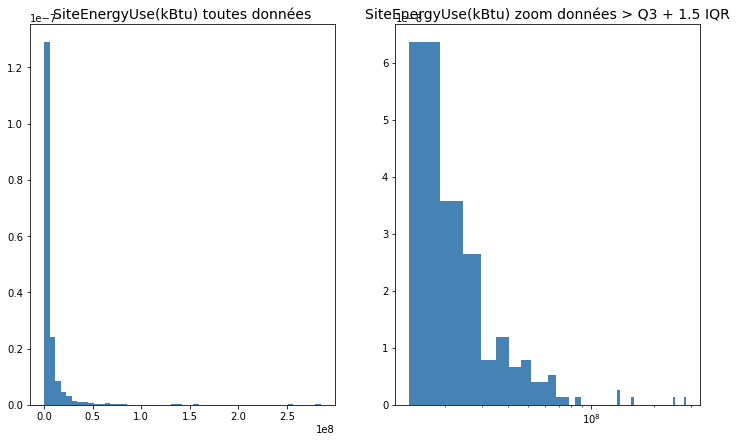

In [92]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2, 1)
ax1.hist(data['SiteEnergyUse(kBtu)'], bins=50, color='steelblue', density=True, edgecolor='none');
ax1.set_title('SiteEnergyUse(kBtu) toutes données', fontsize=14)
# ax1.set(xscale="log")
ax2 = fig.add_subplot(1,2, 2)
ax2.hist(data[data['SiteEnergyUse(kBtu)'] > 13327570.125]['SiteEnergyUse(kBtu)'], 
         bins=50, color='steelblue', density=True, edgecolor='none');
ax2.set_title('SiteEnergyUse(kBtu) zoom données > Q3 + 1.5 IQR', fontsize=14)
ax2.set(xscale="log")

Pas de valeurs aberrantes, mais des valeurs tout de même très élevées ==> suppression des valeurs supérieures à 4.10e7 kBtu (basée sur un premier run de regression linéaire qui montre que ces valeurs sont trop élevées et isolées pour être correctement prédites)

In [93]:
print('suppression de ',
     len(data[(data['SiteEnergyUse(kBtu)'] > 4e7)]), 'lignes')
data = data.drop(data[(data['SiteEnergyUse(kBtu)'] > 4e7)].index)
data.shape

suppression de  31 lignes


(1269, 22)

In [94]:
# suppression des lignes où la variable SiteEnergyUse est NaN
print('suppression de ',
     len(data[data['SiteEnergyUse(kBtu)'].isna()]), 'lignes')
data = data.drop(data[data['SiteEnergyUse(kBtu)'].isna()].index)
data.shape



suppression de  5 lignes


(1264, 22)

#### GHG emissions

In [95]:
outlier_sup(data, 'GHGEmissions(MetricTonsCO2e)')

GHGEmissions(MetricTonsCO2e) : lignes présentant une valeur supérieure à Q3+1.5IQR = 251.22875
(116, 22)


In [96]:
data[data['GHGEmissions(MetricTonsCO2e)'] > 251.22875]['GHGEmissions(MetricTonsCO2e)'].describe()

count     116.000000
mean      446.580431
std       241.324456
min       251.720000
25%       302.430000
50%       365.755000
75%       519.702500
max      1936.340000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

Text(0.5, 1.0, 'GHGEmissions(MetricTonsCO2e) zoom données > Q3 + 1.5 IQR')

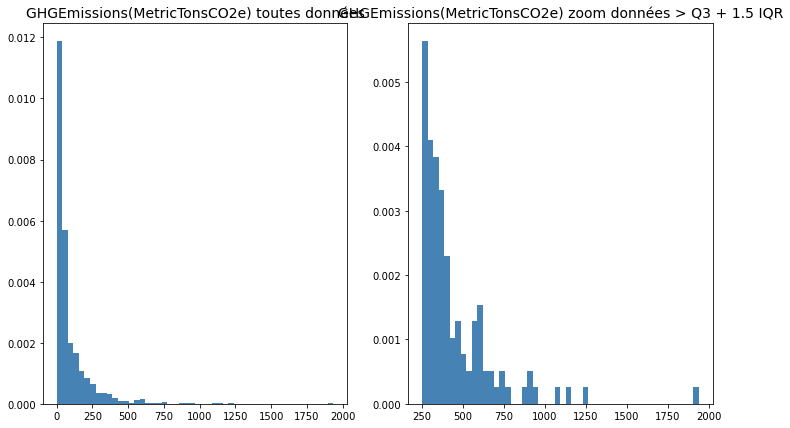

In [97]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2, 1)
ax1.hist(data['GHGEmissions(MetricTonsCO2e)'], bins=50, color='steelblue', density=True, edgecolor='none');
ax1.set_title('GHGEmissions(MetricTonsCO2e) toutes données', fontsize=14)
ax2 = fig.add_subplot(1,2, 2)
ax2.hist(data[data['GHGEmissions(MetricTonsCO2e)'] > 251.22875]['GHGEmissions(MetricTonsCO2e)'], 
         bins=50, color='steelblue', density=True, edgecolor='none');
ax2.set_title('GHGEmissions(MetricTonsCO2e) zoom données > Q3 + 1.5 IQR', fontsize=14)

In [98]:
data[data['GHGEmissions(MetricTonsCO2e)'] > 1500][['PropertyName', 'PropertyGFATotal', 'SiteEnergyUse(kBtu)',
                                                 'GHGEmissions(MetricTonsCO2e)']]

,PropertyName,PropertyGFATotal,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
3,HOTEL MAX,61320,28229320.0,1936.34


Suppression des batiments où GHGEmissions > 1500 MetricTonsCO2e car valeurs trop extrêmes qui risquent de perturber la modélisation

In [99]:
print('suppression de ',
     len(data[data['GHGEmissions(MetricTonsCO2e)'] > 1500]), 'lignes')
data = data.drop(data[data['GHGEmissions(MetricTonsCO2e)'] > 1500].index)
data.shape

suppression de  1 lignes


(1263, 22)

In [100]:
data[data['GHGEmissions(MetricTonsCO2e)'].isna()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),Outlier


#### Variable Outlier 

In [101]:
data['Outlier'].value_counts()

Low Outlier     12
High Outlier    11
Name: Outlier, dtype: int64

In [102]:
data[data['Outlier'].isna() == False][['PropertyName', 'PropertyGFATotal', 'SiteEnergyUse(kBtu)']]

,PropertyName,PropertyGFATotal,SiteEnergyUse(kBtu)
322,1441 LAKE UNION CENTER,103697,15324777.0
387,UNIVERSITY CENTER,69492,408513.0
515,OCEAN BEAUTY SEAFOODS LLC,105100,21832304.0
519,ELLIOTT WEST BLDG 3 - CELL THEREPEUTICS/ADMIN....,165111,22965152.0
520,401 ELLIOTT WEST,129551,25764716.0
646,4545 15TH AVE NE,113944,17924416.0
702,1916 Boren Building,21600,133880.0
784,UNIVERSITY VILLAGE EAST BLDG N,25862,5462958.0
1239,1518 5TH AVE OFFICE,57720,43943.0
1283,FHCRC - FAIRVIEW BLDG.,37740,7291418.0


In [103]:
# imputation variable outlier NaN = 'Non'
data['Outlier'] = np.where(data['Outlier'].isna() == True, 'Non', data['Outlier'])
data['Outlier'].unique()

array(['Non', 'High Outlier', 'Low Outlier'], dtype=object)

<AxesSubplot:xlabel='PropertyGFATotal', ylabel='SiteEnergyUse(kBtu)'>

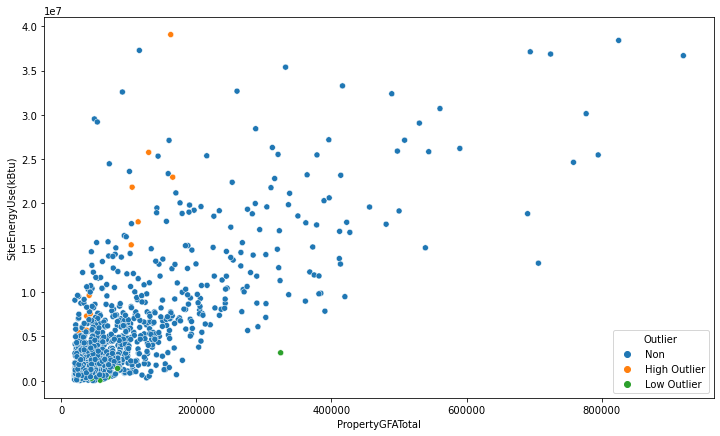

In [104]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,1, 1)
# sns.scatterplot(x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', data=data, )
sns.scatterplot(x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', data=data, hue='Outlier')

cette variable outlier n'est pas très claire : outlier par rapport à quelle variable ? Visiblement pas propertyGFATotal ni SiteEnergyUse

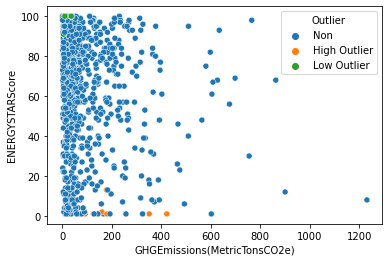

In [105]:
sns.scatterplot(x='GHGEmissions(MetricTonsCO2e)', y='ENERGYSTARScore', data=data, hue='Outlier' );

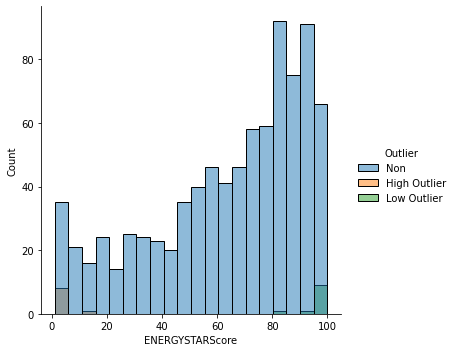

In [106]:
plot = sns.displot(data=data, x='ENERGYSTARScore', bins=20, hue='Outlier')

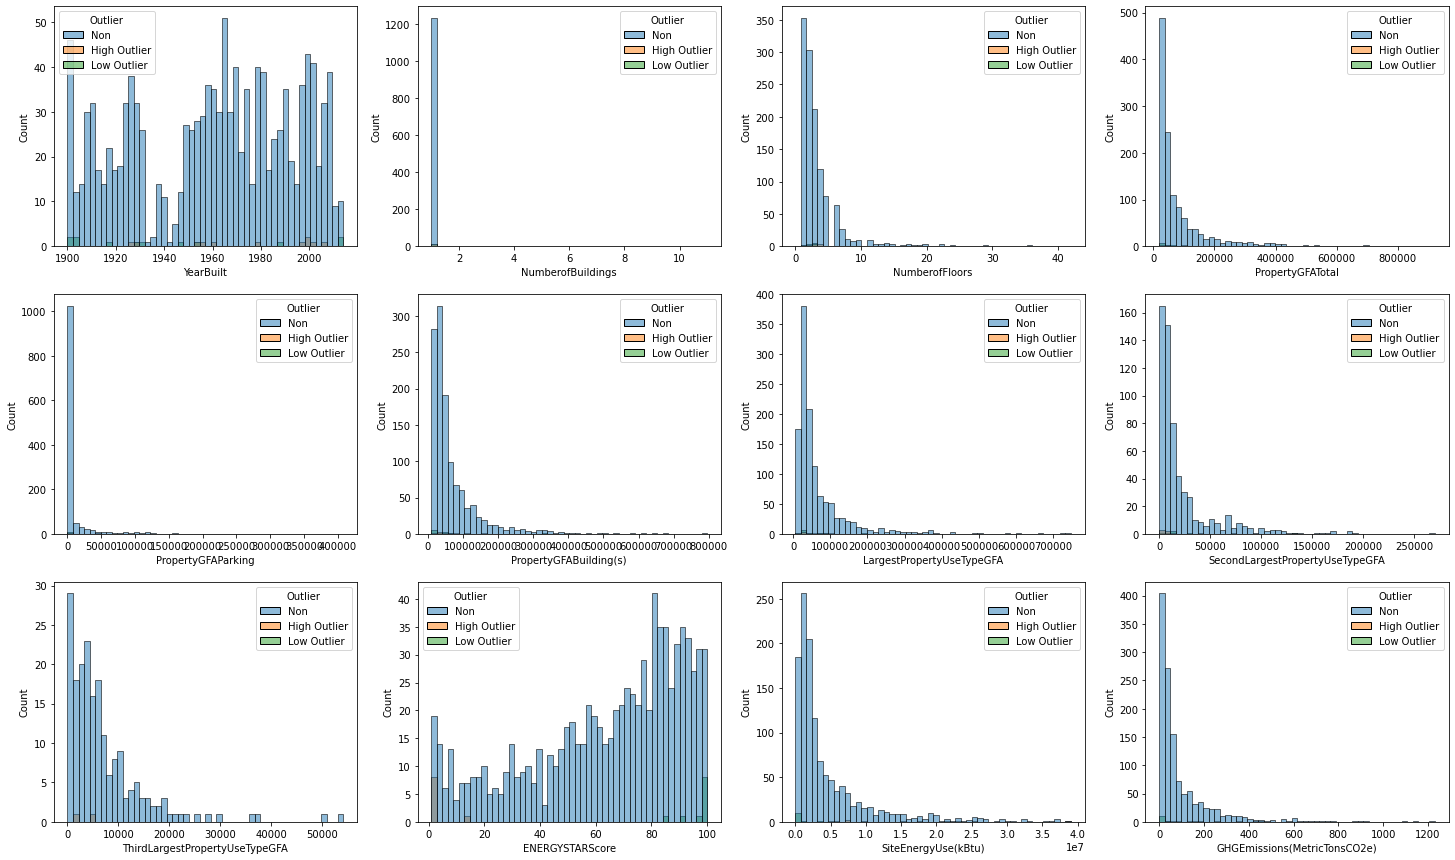

In [107]:
data_qtt = data.select_dtypes(['float64', 'int64'])

fig, axs = plt.subplots(3, 4, figsize=(25, 15))
compteur = 0

for feat in data_qtt.columns:
    ligne = int(compteur/4)
    col = compteur - 4*ligne
    sns.histplot(data=data, x=feat, bins=50, hue='Outlier', ax=axs[ligne, col])
    compteur += 1

Pas de lien clair avec les autres variables ==> suppression de cette variable

In [108]:
liste_2015 = ['Outlier'
             ]

data, liste_colonnes_supp_2015 = suppression_colonnes(data, liste_2015, liste_colonnes_supp_2015)
print(liste_colonnes_supp_2015)
data.columns

['Location', 'CouncilDistrictCode', 'City Council Districts', 'Zip Codes', 'SPD Beats', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'DefaultData', 'ComplianceStatus', 'DataYear', 'TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified', 'Comment', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'Outlier']


Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)'],
      dtype='object')

In [109]:
data.shape

(1263, 21)

In [110]:
pourcent_NA_df(data)

Il y a 85.59% valeurs renseignées (soit 14.41 % de valeurs manquantes) dans l'intégralité du df


## Correlation entre variables

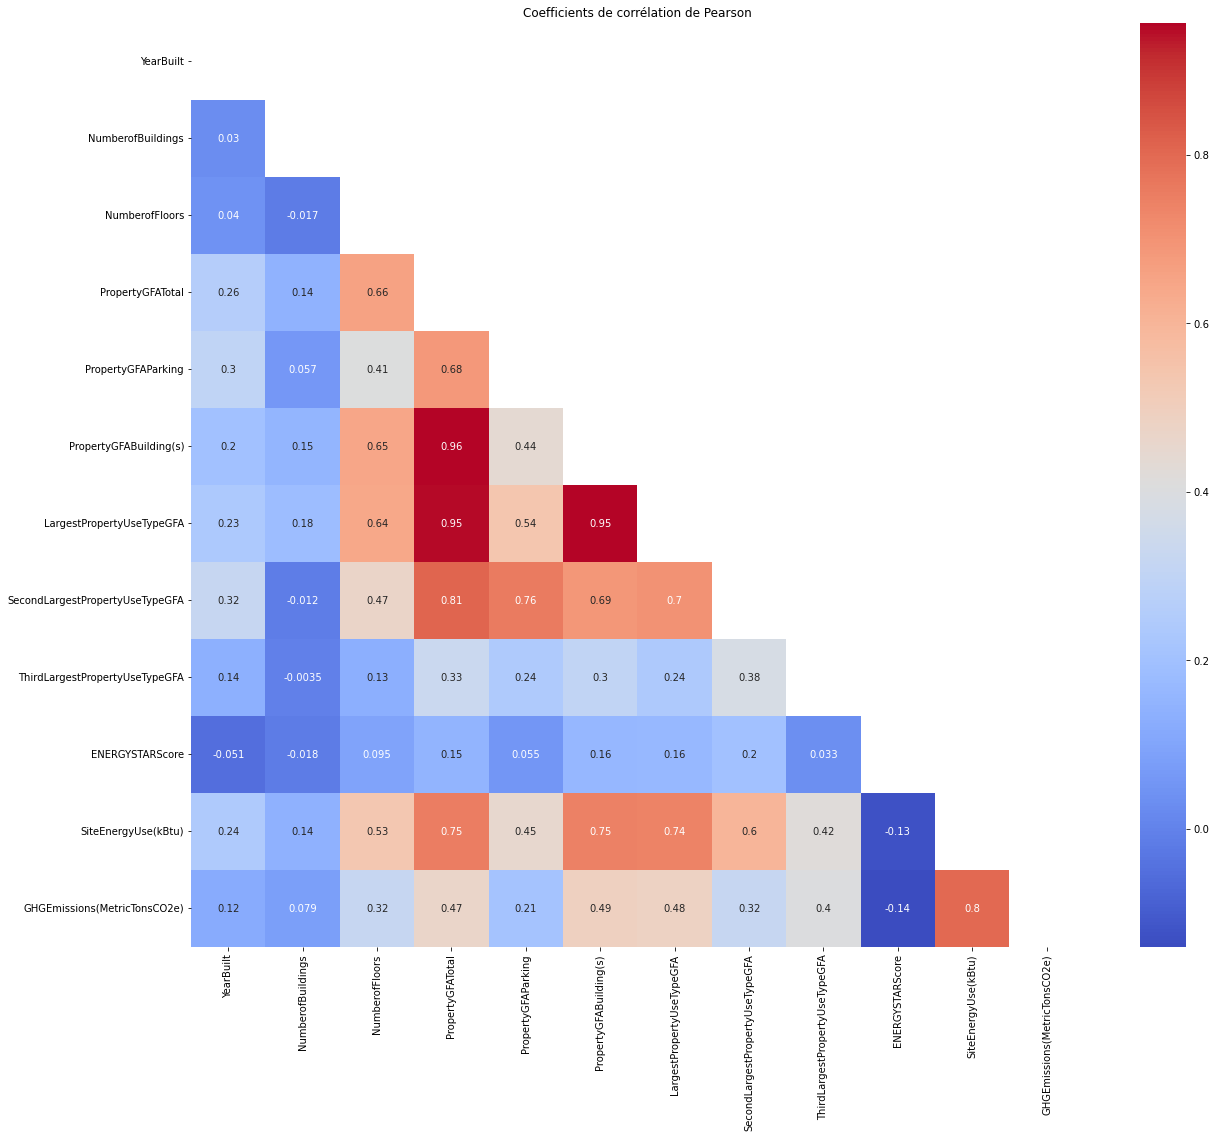

In [111]:
# calcul de la matrice de corrélation et visualisation sous forme de heatmap
corr = data.corr()
# pour masquer la partie supérieure droite de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool))

# graph
fig = plt.figure(figsize=(20,17))
sns.heatmap(data=corr, mask=mask, annot=True,  cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson")
plt.show()

In [112]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)'],
      dtype='object')

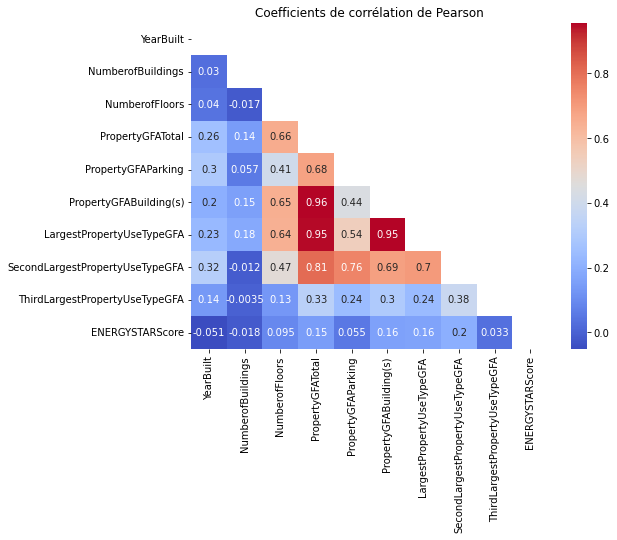

In [113]:
# selection des variables hors target de modélisation
features = data.drop(['SiteEnergyUse(kBtu)',
                       'GHGEmissions(MetricTonsCO2e)'], axis=1)

# calcul de la matrice de corrélation et visualisation sous forme de heatmap
corr = features.corr()
# pour masquer la partie supérieure droite de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool))

# graph
fig = plt.figure(figsize=(8,6))
sns.heatmap(data=corr, mask=mask, annot=True,  cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson")
plt.show()

### Variables bien corrélées (r = [ 0.9 - 1 [ )
- ProperftyGFABuilding(s) vs PropertyGFATotal
- LargestPropertyTypeGFA vs PropertyGFATotal
- LargestPropertyTypeGFA vs PropertyGFABuildings

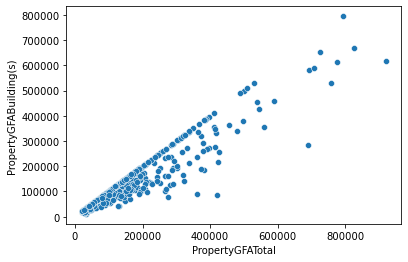

In [114]:
sns.scatterplot(x='PropertyGFATotal', y='PropertyGFABuilding(s)', data=data);

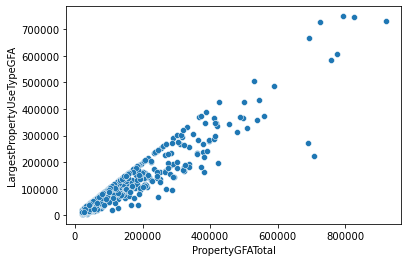

In [115]:
sns.scatterplot(x='PropertyGFATotal', y='LargestPropertyUseTypeGFA', data=data);

### Variables corrélées (r = [0.75 - 0.9 [ )

- SecondLargestPropertyUseTypeGFA vs PropertyGFATotal
- SecondLargestPropertyUseTypeGFA vs PropertyGFABuilding(s)
- SecondLargestPropertyUseTypeGFA vs LargestPropertyUseTypeGFA

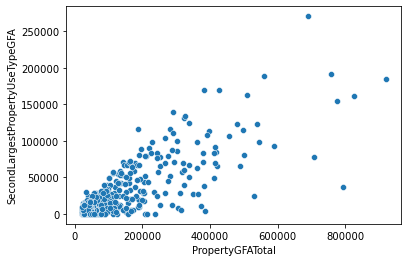

In [116]:
sns.scatterplot(x='PropertyGFATotal', y = 'SecondLargestPropertyUseTypeGFA', data=data);

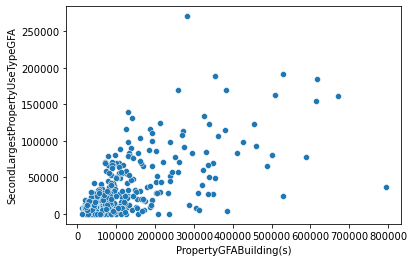

In [117]:
sns.scatterplot(x='PropertyGFABuilding(s)', y = 'SecondLargestPropertyUseTypeGFA', data=data);

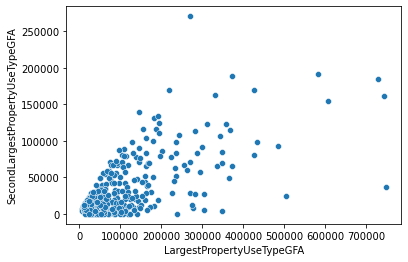

In [118]:
sns.scatterplot(x='LargestPropertyUseTypeGFA', y = 'SecondLargestPropertyUseTypeGFA', data=data);

Une bonne partie des variables de surface sont corrélées entre elles => je ne garde que celles qui ne présentent pas de corrélations entre elles :
- PropertyGFATotal
- PropertyGFAParking
- ThirdLargestPropertyUseGFA

In [119]:
liste_2015 = ['LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)',
              'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA'
             ]

data, liste_colonnes_supp_2015 = suppression_colonnes(data, liste_2015, liste_colonnes_supp_2015)
print(liste_colonnes_supp_2015)
data.columns

['Location', 'CouncilDistrictCode', 'City Council Districts', 'Zip Codes', 'SPD Beats', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'DefaultData', 'ComplianceStatus', 'DataYear', 'TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified', 'Comment', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'Outlier', 'LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA']


Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)'],
      dtype='object')

In [120]:
data.shape

(1263, 18)

In [121]:
pourcent_NA_df(data)

Il y a 86.04% valeurs renseignées (soit 13.96 % de valeurs manquantes) dans l'intégralité du df


### Evaluation de la variance des variables quantitatives

In [122]:
features = data.drop(['SiteEnergyUse(kBtu)',
                       'GHGEmissions(MetricTonsCO2e)'], axis=1)
pd.DataFrame(features.var(), columns=['Variance'])

C:\Users\Helene\AppData\Local\Temp/ipykernel_480/1390047052.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(features.var(), columns=['Variance'])


,Variance
YearBuilt,1.077719e+03
NumberofBuildings,1.264215e-01
NumberofFloors,1.695151e+01
PropertyGFATotal,1.081647e+10
PropertyGFAParking,1.142402e+09
ThirdLargestPropertyUseTypeGFA,6.293454e+07
ENERGYSTARScore,8.094091e+02


NumberofBuildings a une variance très faibles, peu interessante pour de la modélisation

In [123]:
data['NumberofBuildings'].describe()

count    1263.000000
mean        1.019002
std         0.355558
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: NumberofBuildings, dtype: float64

In [124]:
data[data['NumberofBuildings'] > 1]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
127,211,Campus,College/University,NORTH SEATTLE COMMUNITY COLLEGE CAMPUS MASTER ID,NORTHWEST,1970,11,2.0,694072,111625,College/University,College/University,NaN,NaN,NaN,NaN,37117212.0,440.31
195,315,Campus,Other,PORT OF SEATTLE BELL HARBOR COMPLEX & CONFER...,DOWNTOWN,1995,4,3.0,215476,0,Other,Other,NaN,NaN,NaN,NaN,25377650.0,659.56
1944,23846,NonResidential,Small- and Mid-Sized Office,DIAMOND BUILDING,DOWNTOWN,1979,2,3.0,34030,0,Office,Office,NaN,NaN,NaN,49.0,1757194.0,20.95
2936,27389,NonResidential,Small- and Mid-Sized Office,LESCHI LAKE CENTER,CENTRAL,1956,6,2.0,75868,0,"Non-Refrigerated Warehouse, Office, Restaurant...",Office,Restaurant,Retail Store,6662.0,NaN,3075425.0,21.44
3293,49909,Campus,College/University,SOUTH SEATTLE COLLEGE - GEORGETOWN CAMPUS MAST...,GREATER DUWAMISH,2007,6,2.0,149856,0,College/University,College/University,NaN,NaN,NaN,NaN,6125692.0,99.95


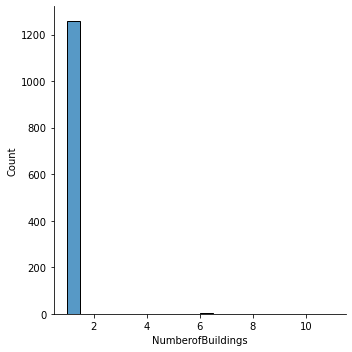

In [125]:
plot = sns.displot(data=data, x='NumberofBuildings', bins=20)

In [126]:
# Suppression de la variable 'NumberofBuildings'
liste_2015 = ['NumberofBuildings'
             ]

data, liste_colonnes_supp_2015 = suppression_colonnes(data, liste_2015, liste_colonnes_supp_2015)
print(liste_colonnes_supp_2015)
data.shape

['Location', 'CouncilDistrictCode', 'City Council Districts', 'Zip Codes', 'SPD Beats', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'DefaultData', 'ComplianceStatus', 'DataYear', 'TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified', 'Comment', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'Outlier', 'LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA', 'NumberofBuildings']


(1263, 17)

In [127]:
pourcent_NA_df(data)

Il y a 85.22% valeurs renseignées (soit 14.78 % de valeurs manquantes) dans l'intégralité du df


## Données catégorielles

Utilisation du test du Khi2 pour déterminer si les variables sont indépendantes ou non

H0: les deux variables sont indépendantes

H1: les variables comparées sont dépendantes


In [128]:
import scipy.stats as st

# fonction pour faire le test du khi2
def test_khi2(dataframe, X, Y, alpha):
    # si beaucoup de données, echantillonnage aléatoire pour permettre le calcul de la matrice de contingence
    if len(dataframe) > 100000:
        data = dataframe[[X,Y]].sample(n=int(len(dataframe)/2))
        print('echantillonnage aléatoire 50%')
    else:
        data = dataframe[[X,Y]]
    
    # tableau de contingence
    cont = data.pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
    cont = cont.fillna(0)
    cont = cont.astype(int)
    
    st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
    
    print('les variables {} et {} présentent une valeur de chi2 de {:0.2f} '.format(X, Y, st_chi2),
          'pour un degrés de liberté de {} et une p-value de {}.'.format(st_dof, st_p))

    
    if st_p < alpha/100:
        print("L'hypothèse H0 est rejetée, les variables {} et {} sont corrélées".format(X, Y))
    else:
        print("L'hypothèse H0 est retenue, les variables {} et {} sont considérées comme indépendantes".format(X, Y))
    

### Correlation des variables avec les variables cible

#### ANOVA via calcul de eta²

In [129]:
def eta_squared(x ,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [130]:
data['SiteEnergyUse(kBtu)'].isna().sum()

0

In [131]:
X = data.select_dtypes(['object']).columns # qualitative
Y = 'SiteEnergyUse(kBtu)' # quantitative

anova = []
features = []
for x in X:
    anova.append(eta_squared(data[x].fillna('None'),data[Y]))
    features.append(x)

In [132]:
res_anova = pd.DataFrame(np.column_stack([features, anova]), columns=['features', 'anova'])
res_anova.sort_values(by='anova')

,features,anova
1,BuildingType,0.01357566785783663
8,ThirdLargestPropertyUseType,0.06187296666353697
4,Neighborhood,0.06894714734449078
7,SecondLargestPropertyUseType,0.11810491344756988
6,LargestPropertyUseType,0.19904632178871118
2,PrimaryPropertyType,0.3247722498767727
5,ListOfAllPropertyUseTypes,0.4333838756552548
3,PropertyName,0.9989589108126904
0,OSEBuildingID,1.0


A priori les variables d'intérêt sont celles présentant un eta² compris entre 0.1 et 0.7

In [133]:
# GHGEmissions
data['GHGEmissions(MetricTonsCO2e)'].isna().sum()

0

In [134]:
X = data.select_dtypes(['object']).columns # qualitative
Y = 'GHGEmissions(MetricTonsCO2e)' # quantitative

anova = []
features = []
for x in X:
    anova.append(eta_squared(data[x].fillna('None'),data[Y]))
    features.append(x)

In [135]:
res_anova = pd.DataFrame(np.column_stack([features, anova]), columns=['features', 'anova'])
res_anova.sort_values(by='anova')

,features,anova
1,BuildingType,0.014166526838926946
8,ThirdLargestPropertyUseType,0.03901361023779865
4,Neighborhood,0.039537278445641394
7,SecondLargestPropertyUseType,0.04198848560632268
2,PrimaryPropertyType,0.20724130991146983
6,LargestPropertyUseType,0.2434985286498958
5,ListOfAllPropertyUseTypes,0.44878180869165485
3,PropertyName,0.9993474245103813
0,OSEBuildingID,1.0


#### Tentative ANOVA via f_classif 

In [136]:
features_quali = data.select_dtypes(['object']).fillna('None')
target_conso_energy = data['SiteEnergyUse(kBtu)']
target_prodCO2 = data['GHGEmissions(MetricTonsCO2e)']

In [137]:
features_quali = pd.get_dummies(features_quali)
features_quali

,OSEBuildingID_1,OSEBuildingID_10,OSEBuildingID_102,OSEBuildingID_104,OSEBuildingID_106,OSEBuildingID_11,OSEBuildingID_113,OSEBuildingID_114,OSEBuildingID_115,OSEBuildingID_116,...,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
from sklearn.feature_selection import SelectKBest, f_classif
stat, pvalue = f_classif(features_quali, target_conso_energy)
stat

C:\Users\Helene\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


array([inf, inf, inf, ..., inf, inf, inf], dtype=float32)

In [139]:
features_quali

,OSEBuildingID_1,OSEBuildingID_10,OSEBuildingID_102,OSEBuildingID_104,OSEBuildingID_106,OSEBuildingID_11,OSEBuildingID_113,OSEBuildingID_114,OSEBuildingID_115,OSEBuildingID_116,...,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
pvalue[pvalue>0]

array([1.        , 1.        , 1.        , 1.        , 0.91657233,
       0.9825311 , 0.98451775, 0.98891646, 0.8425354 , 0.93391633],
      dtype=float32)

#### test ANOVA via scikit learn pour chaque variable qualitative vs target

In [141]:
anova_df = data[['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
                 'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
                 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
                 'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)'
                ]]
anova_df.columns = ['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
                 'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
                 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
                 'SiteEnergyUse_kBtu', 'GHGEmissions_MetricTonsCO2e']

##### Test sur BuildnigType vs EnergySite

In [142]:
anova_df.groupby("BuildingType")['SiteEnergyUse_kBtu'].agg('var')

BuildingType
Campus                1.772130e+14
NonResidential        3.683990e+13
Nonresidential COS    3.629626e+13
SPS-District K-12     1.292380e+13
Name: SiteEnergyUse_kBtu, dtype: float64

In [143]:
# Test homoscédasticité
# H0 : Les variances de chaque groupe sont égales si p-value > 5%
# H1 : Les variances de chaque groupe ne sont pas toutes égales p-value < 5%

from scipy.stats import bartlett
bartlett(anova_df[anova_df['BuildingType'] == 'Campus']['SiteEnergyUse_kBtu'],
         anova_df[anova_df['BuildingType'] == 'NonResidential']['SiteEnergyUse_kBtu'],
         anova_df[anova_df['BuildingType'] == 'Nonresidential COS']['SiteEnergyUse_kBtu'],
         anova_df[anova_df['BuildingType'] == 'SPS-District K-12']['SiteEnergyUse_kBtu'],
        )

BartlettResult(statistic=47.943336140792255, pvalue=2.1894334364542902e-10)

H0 est rejeté, on ne peut pas calculer d'ANOVA sur ce jeu de données

In [144]:
# normalité des résidus
# H0 : Les résidus suivent une loi normale si p-value > 5%
# H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

model = ols('SiteEnergyUse_kBtu ~ BuildingType', data=anova_df).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.6927587985992432, pvalue=5.28289521050456e-43)

H0 est rejeté, les résidus ne suivent pas une loi normale

In [145]:
test = data[['PrimaryPropertyType', 'SiteEnergyUse(kBtu)']]
test.columns = ['PrimaryPropertyType', 'SiteEnergyUse']

model = ols('SiteEnergyUse ~ PrimaryPropertyType', data=test).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
PrimaryPropertyType,17.0,1.520531e+16,8.944299e+14,35.224843,1.027066e-93
Residual,1245.0,3.161306e+16,2.539202e+13,NaN,NaN


# /!\ ==> Question de la validité des calculs précédents
Comment est ce qu'on fait si les données ne respectent pas les conditions d'homoscédasticité et de normalité des résidus ? Quel test est possible ?

##### Tentative de généralisation

In [146]:
# # automatisation test Bartlett
# liste=[]

# for cat in anova_df['BuildingType'].unique():
#     liste.append(anova_df[anova_df['BuildingType'] == cat]['SiteEnergyUse_kBtu'])
# liste[0]

# bartlett(lambda x: liste[x] for x in range(len(liste)))

In [147]:
# automatisation test de normalité des résidus
# H0 : Les résidus suivent une loi normale si p-value > 5%
# H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

for feature in anova_df.iloc[:,:-2].columns:
    model = ols('SiteEnergyUse_kBtu ~ '+ feature, data=anova_df).fit()
    print('-'*30)
    print(feature)
    print(shapiro(model.resid))

------------------------------
OSEBuildingID
ShapiroResult(statistic=0.302714467048645, pvalue=0.0)
------------------------------
BuildingType
ShapiroResult(statistic=0.6927587985992432, pvalue=5.28289521050456e-43)
------------------------------
PrimaryPropertyType
ShapiroResult(statistic=0.7745621800422668, pvalue=1.66382472512375e-38)
------------------------------
PropertyName
ShapiroResult(statistic=0.1580655574798584, pvalue=0.0)
------------------------------
Neighborhood
ShapiroResult(statistic=0.7465592622756958, pvalue=3.5499374256433456e-40)
------------------------------
ListOfAllPropertyUseTypes
ShapiroResult(statistic=0.7396527528762817, pvalue=1.4498114171597422e-40)
------------------------------
LargestPropertyUseType
ShapiroResult(statistic=0.7607945203781128, pvalue=2.6937973132825267e-39)
------------------------------
SecondLargestPropertyUseType
ShapiroResult(statistic=0.8090168237686157, pvalue=2.0607405723368714e-26)
------------------------------
ThirdLargestP

Aucune des variables ne passe le test de Shapiro

In [148]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

features_quali = anova_df.select_dtypes(['object'])
target_conso_energy = data['SiteEnergyUse(kBtu)']
target_prodCO2 = data['GHGEmissions(MetricTonsCO2e)']

# vis à vis de la consommation energetique
for feature in features_quali.columns:
    temp_df = anova_df[[feature, 'SiteEnergyUse_kBtu']]
    
    model = ols('SiteEnergyUse_kBtu ~ '+feature, data=temp_df).fit()
    anova_table = sm.stats.anova_lm(model)
    print('-'*45, '\n', feature)
    print(anova_table)

C:\Users\Helene\anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


--------------------------------------------- 
 OSEBuildingID
                   df        sum_sq       mean_sq    F  PR(>F)
OSEBuildingID  1262.0  4.681837e+16  3.709855e+13  0.0     NaN
Residual          0.0  2.027639e-11           inf  NaN     NaN
--------------------------------------------- 
 BuildingType
                  df        sum_sq       mean_sq         F    PR(>F)
BuildingType     3.0  6.355907e+14  2.118636e+14  5.775664  0.000638
Residual      1259.0  4.618278e+16  3.668211e+13       NaN       NaN
--------------------------------------------- 
 PrimaryPropertyType
                         df        sum_sq       mean_sq          F  \
PrimaryPropertyType    17.0  1.520531e+16  8.944299e+14  35.224843   
Residual             1245.0  3.161306e+16  2.539202e+13        NaN   

                           PR(>F)  
PrimaryPropertyType  1.027066e-93  
Residual                      NaN  
--------------------------------------------- 
 PropertyName
                  df        sum_s

##### Essai avec target normalisée

In [149]:
# normalisation de target
from sklearn.preprocessing import StandardScaler
anova_df['target_stdscl'] = (anova_df['SiteEnergyUse_kBtu'] - anova_df['SiteEnergyUse_kBtu'].mean())/anova_df['SiteEnergyUse_kBtu'].std()

C:\Users\Helene\AppData\Local\Temp/ipykernel_480/1764009858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_df['target_stdscl'] = (anova_df['SiteEnergyUse_kBtu'] - anova_df['SiteEnergyUse_kBtu'].mean())/anova_df['SiteEnergyUse_kBtu'].std()


In [150]:
# automatisation test de normalité des résidus
# H0 : Les résidus suivent une loi normale si p-value > 5%
# H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

for feature in features_quali.columns:
    model = ols('target_stdscl ~ '+ feature, data=anova_df).fit()
    print('-'*30)
    print(feature)
    print(shapiro(model.resid))

------------------------------
OSEBuildingID
ShapiroResult(statistic=0.2913687825202942, pvalue=0.0)
------------------------------
BuildingType
ShapiroResult(statistic=0.6927589774131775, pvalue=5.28289521050456e-43)
------------------------------
PrimaryPropertyType
ShapiroResult(statistic=0.7745623588562012, pvalue=1.663865923298601e-38)
------------------------------
PropertyName
ShapiroResult(statistic=0.15806567668914795, pvalue=0.0)
------------------------------
Neighborhood
ShapiroResult(statistic=0.7465595006942749, pvalue=3.5499794645972753e-40)
------------------------------
ListOfAllPropertyUseTypes
ShapiroResult(statistic=0.7396527528762817, pvalue=1.4498114171597422e-40)
------------------------------
LargestPropertyUseType
ShapiroResult(statistic=0.7607944011688232, pvalue=2.693730050956239e-39)
------------------------------
SecondLargestPropertyUseType
ShapiroResult(statistic=0.8090167045593262, pvalue=2.0606986641012815e-26)
------------------------------
ThirdLarges

La normalisation de la target ne change pas le probleme de la normalité des résidus

##### Essai avec robustScaler

In [151]:
from sklearn.preprocessing import RobustScaler
y = pd.DataFrame(anova_df['SiteEnergyUse_kBtu'])
anova_df['target_Robscl'] = RobustScaler().fit_transform(y)

C:\Users\Helene\AppData\Local\Temp/ipykernel_480/3353389165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_df['target_Robscl'] = RobustScaler().fit_transform(y)


In [152]:
anova_df['target_Robscl'].describe()

count    1263.000000
mean        0.538423
std         1.343784
min        -0.486873
25%        -0.241892
50%         0.000000
75%         0.758108
max         8.128439
Name: target_Robscl, dtype: float64

In [153]:
# automatisation test de normalité des résidus
# H0 : Les résidus suivent une loi normale si p-value > 5%
# H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

for feature in features_quali.columns:
    model = ols('target_Robscl ~ '+ feature, data=anova_df).fit()
    print('-'*30)
    print(feature)
    print(shapiro(model.resid))

------------------------------
OSEBuildingID
ShapiroResult(statistic=0.24886590242385864, pvalue=0.0)
------------------------------
BuildingType
ShapiroResult(statistic=0.6927589178085327, pvalue=5.28289521050456e-43)
------------------------------
PrimaryPropertyType
ShapiroResult(statistic=0.7745624780654907, pvalue=1.6638865223860266e-38)
------------------------------
PropertyName
ShapiroResult(statistic=0.15806561708450317, pvalue=0.0)
------------------------------
Neighborhood
ShapiroResult(statistic=0.7465592622756958, pvalue=3.5499374256433456e-40)
------------------------------
ListOfAllPropertyUseTypes
ShapiroResult(statistic=0.7396527528762817, pvalue=1.4498114171597422e-40)
------------------------------
LargestPropertyUseType
ShapiroResult(statistic=0.7607944011688232, pvalue=2.693730050956239e-39)
------------------------------
SecondLargestPropertyUseType
ShapiroResult(statistic=0.8090167045593262, pvalue=2.0606986641012815e-26)
------------------------------
ThirdLarg

n'améliore toujours pas les résultats à ce test

### UseType
#### Corrélation entre les variables avant traitement

- variables corrélées

In [154]:
test_khi2(data, 'LargestPropertyUseType', 'ListOfAllPropertyUseTypes', alpha=0.1)

les variables LargestPropertyUseType et ListOfAllPropertyUseTypes présentent une valeur de chi2 de 60693.32  pour un degrés de liberté de 12954 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables LargestPropertyUseType et ListOfAllPropertyUseTypes sont corrélées


In [155]:
test_khi2(data, 'SecondLargestPropertyUseType', 'ListOfAllPropertyUseTypes', alpha=0.1)

les variables SecondLargestPropertyUseType et ListOfAllPropertyUseTypes présentent une valeur de chi2 de 20964.93  pour un degrés de liberté de 8094 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables SecondLargestPropertyUseType et ListOfAllPropertyUseTypes sont corrélées


In [156]:
test_khi2(data, 'ThirdLargestPropertyUseType', 'ListOfAllPropertyUseTypes', alpha=0.1)

les variables ThirdLargestPropertyUseType et ListOfAllPropertyUseTypes présentent une valeur de chi2 de 4938.84  pour un degrés de liberté de 3799 et une p-value de 2.6717332240898295e-33.
L'hypothèse H0 est rejetée, les variables ThirdLargestPropertyUseType et ListOfAllPropertyUseTypes sont corrélées


In [157]:
test_khi2(data, 'LargestPropertyUseType', 'SecondLargestPropertyUseType', alpha=0.1)

les variables LargestPropertyUseType et SecondLargestPropertyUseType présentent une valeur de chi2 de 2468.59  pour un degrés de liberté de 1558 et une p-value de 2.299052212748412e-44.
L'hypothèse H0 est rejetée, les variables LargestPropertyUseType et SecondLargestPropertyUseType sont corrélées


In [158]:
test_khi2(data, 'ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType', alpha=0.1)

les variables ThirdLargestPropertyUseType et SecondLargestPropertyUseType présentent une valeur de chi2 de 1141.98  pour un degrés de liberté de 957 et une p-value de 3.194481104567673e-05.
L'hypothèse H0 est rejetée, les variables ThirdLargestPropertyUseType et SecondLargestPropertyUseType sont corrélées


In [159]:
test_khi2(data, 'LargestPropertyUseType', 'ThirdLargestPropertyUseType', alpha=0.1)

les variables LargestPropertyUseType et ThirdLargestPropertyUseType présentent une valeur de chi2 de 1107.87  pour un degrés de liberté de 754 et une p-value de 6.241167645828398e-16.
L'hypothèse H0 est rejetée, les variables LargestPropertyUseType et ThirdLargestPropertyUseType sont corrélées


- Variables indépendantes

#### Variable LargestPropertyUseType

In [160]:
data['LargestPropertyUseType'].value_counts()

Office                                                  390
Non-Refrigerated Warehouse                              169
K-12 School                                              97
Other                                                    79
Retail Store                                             77
Worship Facility                                         60
Hotel                                                    52
Distribution Center                                      49
Medical Office                                           35
Supermarket/Grocery Store                                28
Self-Storage Facility                                    27
Senior Care Community                                    17
Other - Entertainment/Public Assembly                    14
Parking                                                  14
Residence Hall/Dormitory                                 14
College/University                                       13
Other - Recreation                      

In [161]:
low_use_type = pd.DataFrame(data['LargestPropertyUseType'].value_counts() < 10)
low_use_type = low_use_type[low_use_type['LargestPropertyUseType'] == True]
low_use_type = low_use_type.index.values
low_use_type

# remplacement des valeurs de UseType par Other quand il y a moins de 10 occurrences
for useType in low_use_type:
    data['LargestPropertyUseType'] = data['LargestPropertyUseType'].str.replace(useType, 'Other', regex=True)

data['LargestPropertyUseType'].value_counts()

Office                                                  390
Non-Refrigerated Warehouse                              169
Other                                                   154
K-12 School                                              97
Retail Store                                             77
Worship Facility                                         60
Hotel                                                    52
Distribution Center                                      49
Medical Office                                           35
Supermarket/Grocery Store                                28
Self-Storage Facility                                    27
Senior Care Community                                    17
Residence Hall/Dormitory                                 14
Parking                                                  14
Other - Entertainment/Public Assembly                    14
College/University                                       13
Other - Recreation                      

In [162]:
# remplacement des dernières entrées
data['LargestPropertyUseType'] = np.where(data['LargestPropertyUseType'].str.contains('Repair Services') == True, 
                                                'Other', 
                                                data['LargestPropertyUseType']
                                               )
data['LargestPropertyUseType'] = np.where(data['LargestPropertyUseType'].str.contains('Other/Bar') == True, 
                                                'Other', 
                                                data['LargestPropertyUseType']
                                               )
data['LargestPropertyUseType'] = np.where(data['LargestPropertyUseType'].str.contains('Hospital') == True, 
                                                'Other', 
                                                data['LargestPropertyUseType']
                                               )
data['LargestPropertyUseType'] = np.where(data['LargestPropertyUseType'].str.contains('Personal Services') == True, 
                                                'Other', 
                                                data['LargestPropertyUseType']
                                               )
data['LargestPropertyUseType'].value_counts()

Office                                   390
Non-Refrigerated Warehouse               169
Other                                    159
K-12 School                               97
Retail Store                              77
Worship Facility                          60
Hotel                                     52
Distribution Center                       49
Medical Office                            35
Supermarket/Grocery Store                 28
Self-Storage Facility                     27
Senior Care Community                     17
Parking                                   14
Residence Hall/Dormitory                  14
Other - Entertainment/Public Assembly     14
College/University                        13
Other - Recreation                        13
Refrigerated Warehouse                    11
Social/Meeting Hall                       10
Restaurant                                10
Name: LargestPropertyUseType, dtype: int64

#### Variable SecondLargestUseType : Regroupement des catégories

In [163]:
data['SecondLargestPropertyUseType'].value_counts()

Parking                                            228
Office                                             133
Retail Store                                        70
Other                                               36
Non-Refrigerated Warehouse                          28
Restaurant                                          27
Other - Services                                     9
Data Center                                          8
Medical Office                                       7
Distribution Center                                  6
Supermarket/Grocery Store                            6
Fitness Center/Health Club/Gym                       6
Other - Entertainment/Public Assembly                6
Bank Branch                                          5
K-12 School                                          4
Repair Services (Vehicle, Shoe, Locksmith, etc)      4
Laboratory                                           4
Self-Storage Facility                                3
Other - Re

In [164]:
low_use_type = pd.DataFrame(data['SecondLargestPropertyUseType'].value_counts() < 10)
low_use_type = low_use_type[low_use_type['SecondLargestPropertyUseType'] == True]
low_use_type = low_use_type.index.values
low_use_type

# data['SecondLargestPropertyUseType'] = data['SecondLargestPropertyUseType'].str.replace('Other - Services', 'Other')

# remplacement des valeurs de UseType par Other quand il y a moins de 10 occurrences
for useType in low_use_type:
#     print(useType)
    data['SecondLargestPropertyUseType'] = data['SecondLargestPropertyUseType'].str.replace(useType, 'Other', regex=True)

data['SecondLargestPropertyUseType'].value_counts()

Parking                                            228
Office                                             133
Other                                              129
Retail Store                                        70
Non-Other                                           28
Restaurant                                          27
Repair Services (Vehicle, Shoe, Locksmith, etc)      4
Name: SecondLargestPropertyUseType, dtype: int64

In [165]:
# remplacement des deux dernières entrées
data['SecondLargestPropertyUseType'] = np.where(data['SecondLargestPropertyUseType'].str.contains('Repair Services') == True, 
                                                'Other', 
                                                data['SecondLargestPropertyUseType']
                                               )
data['SecondLargestPropertyUseType'] = np.where(data['SecondLargestPropertyUseType'].str.contains('Hospital') == True, 
                                                'Other', 
                                                data['SecondLargestPropertyUseType']
                                               )
data['SecondLargestPropertyUseType'].value_counts()

Parking         228
Other           133
Office          133
Retail Store     70
Non-Other        28
Restaurant       27
Name: SecondLargestPropertyUseType, dtype: int64

#### Variable ThirdUseType : regroupement des catégories

In [166]:
data['ThirdLargestPropertyUseType'].value_counts()

Office                                                  32
Retail Store                                            32
Other                                                   24
Parking                                                 23
Restaurant                                              17
Non-Refrigerated Warehouse                              10
Data Center                                              9
Food Service                                             6
Medical Office                                           4
Social/Meeting Hall                                      4
Other - Restaurant/Bar                                   4
Fitness Center/Health Club/Gym                           3
Pre-school/Daycare                                       3
Other - Recreation                                       3
Other - Entertainment/Public Assembly                    2
Refrigerated Warehouse                                   2
Self-Storage Facility                                   

In [167]:
low_use_type = pd.DataFrame(data['ThirdLargestPropertyUseType'].value_counts() < 10)
low_use_type = low_use_type[low_use_type['ThirdLargestPropertyUseType'] == True]
low_use_type = low_use_type.index.values
low_use_type

# data['SecondLargestPropertyUseType'] = data['SecondLargestPropertyUseType'].str.replace('Other - Services', 'Other')

# remplacement des valeurs de UseType par Other quand il y a moins de 10 occurrences
for useType in low_use_type:
#     print(useType)
    data['ThirdLargestPropertyUseType'] = data['ThirdLargestPropertyUseType'].str.replace(useType, 'Other', regex=True)

data['ThirdLargestPropertyUseType'].value_counts()

Other                                                   81
Office                                                  32
Retail Store                                            32
Parking                                                 23
Restaurant                                              17
Non-Other                                               10
Personal Services (Health/Beauty, Dry Cleaning, etc)     1
Name: ThirdLargestPropertyUseType, dtype: int64

In [168]:
# remplacement de la dernière entrée
data['ThirdLargestPropertyUseType'] = np.where(data['ThirdLargestPropertyUseType'].str.contains('Personal Services') == True, 
                                                'Other', 
                                                data['ThirdLargestPropertyUseType']
                                               )
data['ThirdLargestPropertyUseType'].value_counts()

Other           82
Office          32
Retail Store    32
Parking         23
Restaurant      17
Non-Other       10
Name: ThirdLargestPropertyUseType, dtype: int64

#### Construction d'une variable synthétique de type ListOfAllPropertyTypes basée sur les données simplifiées

In [169]:
data['UseType'] = np.where(data['LargestPropertyUseType'].isna()==False,
                           data['LargestPropertyUseType']+',',
                           'NaN'+',') + np.where(data['SecondLargestPropertyUseType'].isna()==False,
                                                   data['SecondLargestPropertyUseType']+',',
                                                   'NaN'+',') + np.where(data['ThirdLargestPropertyUseType'].isna()==False,
                                                                         data['ThirdLargestPropertyUseType'],
                                                                         'NaN')

data['UseType'].value_counts()

Office,NaN,NaN                                        119
Office,Parking,NaN                                    103
K-12 School,NaN,NaN                                    95
Other,NaN,NaN                                          88
Non-Refrigerated Warehouse,NaN,NaN                     87
                                                     ... 
Distribution Center,Office,Other                        1
Other - Recreation,Parking,Other                        1
Retail Store,Restaurant,NaN                             1
Other - Entertainment/Public Assembly,Office,Other      1
Senior Care Community,Other,Office                      1
Name: UseType, Length: 160, dtype: int64

In [170]:
data.shape

(1263, 18)

##### Nettoyage de UseType :
il ne faut pas garder les valeurs uniques car elles risques de poser probleme dans la phase de preprocessing/modeling car ces valeurs ne seront pas forcément présentes dans le train et le test set

In [171]:
low_use_type = pd.DataFrame(data['UseType'].value_counts() < 10)
low_use_type = low_use_type[low_use_type['UseType'] == True]
low_use_type = low_use_type.index.values
low_use_type

# remplacement des valeurs de UseType par Other quand il y a moins de 10 occurrences
for useType in low_use_type:
    data['UseType'] = data['UseType'].str.replace(useType, 'Other', regex=True)

data['UseType'].value_counts()

Other                                    347
Non-Other                                135
Office,NaN,NaN                           119
Office,Parking,NaN                       103
K-12 School,NaN,NaN                       95
Other,NaN,NaN                             88
Worship Facility,NaN,NaN                  43
Retail Store,NaN,NaN                      43
Office,Retail Store,NaN                   33
Office,Other,NaN                          31
Hotel,NaN,NaN                             28
Office,Parking,Other                      25
Other,Parking,NaN                         23
Self-Storage Facility,NaN,NaN             23
Distribution Center,NaN,NaN               21
Medical Office,NaN,NaN                    19
Supermarket/Grocery Store,NaN,NaN         17
Distribution Center,Office,NaN            14
Other,Office,NaN                          12
Hotel,Parking,NaN                         12
Residence Hall/Dormitory,NaN,NaN          11
College/University,NaN,NaN                10
Supermarke

In [172]:
# remplacement des dernières entrées
data['UseType'] = np.where(data['UseType'].str.contains('Medical Other') == True, 
                                                'Other', 
                                                data['UseType'])

In [173]:
data['UseType'].value_counts()

Other                                    348
Non-Other                                135
Office,NaN,NaN                           119
Office,Parking,NaN                       103
K-12 School,NaN,NaN                       95
Other,NaN,NaN                             88
Worship Facility,NaN,NaN                  43
Retail Store,NaN,NaN                      43
Office,Retail Store,NaN                   33
Office,Other,NaN                          31
Hotel,NaN,NaN                             28
Office,Parking,Other                      25
Other,Parking,NaN                         23
Self-Storage Facility,NaN,NaN             23
Distribution Center,NaN,NaN               21
Medical Office,NaN,NaN                    19
Supermarket/Grocery Store,NaN,NaN         17
Distribution Center,Office,NaN            14
Other,Office,NaN                          12
Hotel,Parking,NaN                         12
Residence Hall/Dormitory,NaN,NaN          11
College/University,NaN,NaN                10
Supermarke

#### Corrélation entre variables après traitement
- variables corrélées

In [174]:
test_khi2(data, 'LargestPropertyUseType', 'ListOfAllPropertyUseTypes', alpha=0.1)

les variables LargestPropertyUseType et ListOfAllPropertyUseTypes présentent une valeur de chi2 de 22322.88  pour un degrés de liberté de 5080 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables LargestPropertyUseType et ListOfAllPropertyUseTypes sont corrélées


In [175]:
test_khi2(data, 'SecondLargestPropertyUseType', 'ListOfAllPropertyUseTypes', alpha=0.1)

les variables SecondLargestPropertyUseType et ListOfAllPropertyUseTypes présentent une valeur de chi2 de 2301.67  pour un degrés de liberté de 1278 et une p-value de 1.8975077669564614e-61.
L'hypothèse H0 est rejetée, les variables SecondLargestPropertyUseType et ListOfAllPropertyUseTypes sont corrélées


In [176]:
test_khi2(data, 'LargestPropertyUseType', 'SecondLargestPropertyUseType', alpha=0.1)

les variables LargestPropertyUseType et SecondLargestPropertyUseType présentent une valeur de chi2 de 435.35  pour un degrés de liberté de 120 et une p-value de 2.4557987223570426e-37.
L'hypothèse H0 est rejetée, les variables LargestPropertyUseType et SecondLargestPropertyUseType sont corrélées


In [177]:
test_khi2(data, 'ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType', alpha=0.1)

les variables ThirdLargestPropertyUseType et SecondLargestPropertyUseType présentent une valeur de chi2 de 90.21  pour un degrés de liberté de 36 et une p-value de 1.5091610464419357e-06.
L'hypothèse H0 est rejetée, les variables ThirdLargestPropertyUseType et SecondLargestPropertyUseType sont corrélées


In [178]:
test_khi2(data, 'UseType', 'ListOfAllPropertyUseTypes', alpha=0.1)

les variables UseType et ListOfAllPropertyUseTypes présentent une valeur de chi2 de 25980.94  pour un degrés de liberté de 5842 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables UseType et ListOfAllPropertyUseTypes sont corrélées


In [179]:
test_khi2(data, 'UseType', 'LargestPropertyUseType', alpha=0.1)

les variables UseType et LargestPropertyUseType présentent une valeur de chi2 de 11929.04  pour un degrés de liberté de 460 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables UseType et LargestPropertyUseType sont corrélées


In [180]:
test_khi2(data, 'UseType', 'SecondLargestPropertyUseType', alpha=0.1)

les variables UseType et SecondLargestPropertyUseType présentent une valeur de chi2 de 1017.50  pour un degrés de liberté de 66 et une p-value de 1.8595910405089666e-170.
L'hypothèse H0 est rejetée, les variables UseType et SecondLargestPropertyUseType sont corrélées


In [181]:
test_khi2(data, 'UseType', 'ThirdLargestPropertyUseType', alpha=0.1)

les variables UseType et ThirdLargestPropertyUseType présentent une valeur de chi2 de 39.84  pour un degrés de liberté de 12 et une p-value de 7.651645211656756e-05.
L'hypothèse H0 est rejetée, les variables UseType et ThirdLargestPropertyUseType sont corrélées


- Variables indépendantes

In [182]:
test_khi2(data, 'LargestPropertyUseType', 'ThirdLargestPropertyUseType', alpha=0.1)

les variables LargestPropertyUseType et ThirdLargestPropertyUseType présentent une valeur de chi2 de 127.91  pour un degrés de liberté de 102 et une p-value de 0.042197781764637676.
L'hypothèse H0 est retenue, les variables LargestPropertyUseType et ThirdLargestPropertyUseType sont considérées comme indépendantes


In [183]:
test_khi2(data, 'ThirdLargestPropertyUseType', 'ListOfAllPropertyUseTypes', alpha=0.1)

les variables ThirdLargestPropertyUseType et ListOfAllPropertyUseTypes présentent une valeur de chi2 de 726.45  pour un degrés de liberté de 786 et une p-value de 0.9363511490786044.
L'hypothèse H0 est retenue, les variables ThirdLargestPropertyUseType et ListOfAllPropertyUseTypes sont considérées comme indépendantes


In [184]:
liste_khi2 = data.columns[data.columns.str.contains('UseType')].values
liste_khi2 = np.delete(liste_khi2,[4])
liste_khi2

array(['ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'UseType'], dtype=object)

In [185]:
# initialisation tableau de correlation basé sur le test du Khi2
# 1 = p<alpha les variables sont corrélées
# 0 = p> alpha les variables sont indépendantes

khi2_corr = pd.DataFrame(index=liste_khi2, columns=liste_khi2)
khi2_corr

,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,UseType
ListOfAllPropertyUseTypes,NaN,NaN,NaN,NaN,NaN
LargestPropertyUseType,NaN,NaN,NaN,NaN,NaN
SecondLargestPropertyUseType,NaN,NaN,NaN,NaN,NaN
ThirdLargestPropertyUseType,NaN,NaN,NaN,NaN,NaN
UseType,NaN,NaN,NaN,NaN,NaN


In [186]:
for i in range(len(liste_khi2)):
    feature_1 = liste_khi2[i]
    print('_'*15)
    print(feature_1)
    print('_'*15)
    for j in range(i+1, len(liste_khi2)):
        feature_2 = liste_khi2[j]
        test_khi2(data, feature_1, feature_2, alpha=0.1)
        print('\n')

_______________
ListOfAllPropertyUseTypes
_______________
les variables ListOfAllPropertyUseTypes et LargestPropertyUseType présentent une valeur de chi2 de 22322.88  pour un degrés de liberté de 5080 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables ListOfAllPropertyUseTypes et LargestPropertyUseType sont corrélées


les variables ListOfAllPropertyUseTypes et SecondLargestPropertyUseType présentent une valeur de chi2 de 2301.67  pour un degrés de liberté de 1278 et une p-value de 1.8975077669564614e-61.
L'hypothèse H0 est rejetée, les variables ListOfAllPropertyUseTypes et SecondLargestPropertyUseType sont corrélées


les variables ListOfAllPropertyUseTypes et ThirdLargestPropertyUseType présentent une valeur de chi2 de 726.45  pour un degrés de liberté de 786 et une p-value de 0.9363511490786044.
L'hypothèse H0 est retenue, les variables ListOfAllPropertyUseTypes et ThirdLargestPropertyUseType sont considérées comme indépendantes


les variables ListOfAllPropertyUseTyp

In [187]:
# calcul du khi2 pour chaque paire de variable
for i in range(0, len(liste_khi2)):
    feature_1 = liste_khi2[i]
    khi2_corr.iloc[i,i] = 1
    for j in range(i+1, len(liste_khi2)):
        feature_2 = liste_khi2[j]
        
        data_cont = data[[feature_1, feature_2]] 
        # tableau de contingence
        cont = data_cont.pivot_table(index=feature_1,columns=feature_2,aggfunc=len,margins=True,margins_name="Total")
        cont = cont.fillna(0)
        cont = cont.astype(int)
        
        # calcul khi2
        st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
        
        if st_p < 0.1/100:
            # rejet hypothèse H0 => variables corrélées
#             print(feature_1, feature_2, 1)
            khi2_corr.iloc[j,i] = 1
            khi2_corr.iloc[i,j] = 1
        else:
            # hypothèse H0 validée => variables indépendantes
#             print(feature_1, feature_2, 0)
            khi2_corr.iloc[j,i] = 0
            khi2_corr.iloc[i,j] = 0
khi2_corr

,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,UseType
ListOfAllPropertyUseTypes,1,1,1,0,1
LargestPropertyUseType,1,1,1,0,1
SecondLargestPropertyUseType,1,1,1,1,1
ThirdLargestPropertyUseType,0,0,1,1,1
UseType,1,1,1,1,1


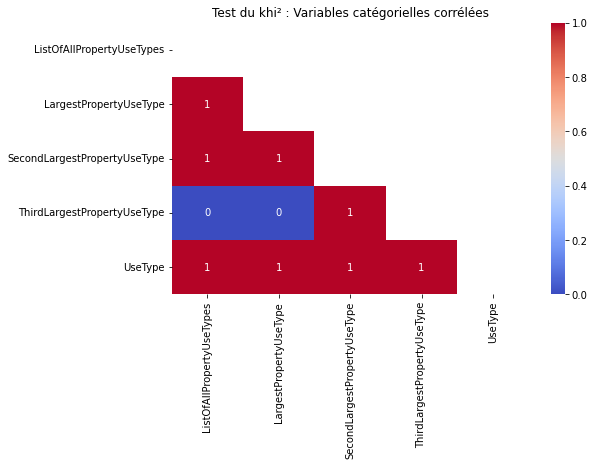

In [188]:
# visualisation sous forme de heatmap
khi2_corr = khi2_corr.astype('int')
# pour masquer la partie supérieure droite de la matrice de corrélation
mask = np.triu(np.ones_like(khi2_corr, dtype=bool))

# graph
fig = plt.figure(figsize=(8,5))
sns.heatmap(data=khi2_corr, mask=mask, annot=True,  cmap='coolwarm')
plt.title("Test du khi² : Variables catégorielles corrélées")
plt.show()

##### Calcul ANOVA

In [189]:
X = data.select_dtypes(['object']).columns # qualitative
Y = 'SiteEnergyUse(kBtu)' # quantitative

anova = []
features = []
for x in X:
    anova.append(eta_squared(data[x].fillna('None'),data[Y]))
    features.append(x)

In [190]:
res_anova_Ee = pd.DataFrame(np.column_stack([features, anova]), columns=['features', 'anova_Ee'])
res_anova_Ee.sort_values(by='anova_Ee')

,features,anova_Ee
1,BuildingType,0.01357566785783663
8,ThirdLargestPropertyUseType,0.036794974717465186
4,Neighborhood,0.06894714734449078
7,SecondLargestPropertyUseType,0.08547821438222551
6,LargestPropertyUseType,0.13970449495623652
9,UseType,0.17347236475498953
2,PrimaryPropertyType,0.3247722498767727
5,ListOfAllPropertyUseTypes,0.4333838756552548
3,PropertyName,0.9989589108126904
0,OSEBuildingID,1.0


In [191]:
X = data.select_dtypes(['object']).columns # qualitative
Y = 'GHGEmissions(MetricTonsCO2e)' # quantitative

anova = []
features = []
for x in X:
    anova.append(eta_squared(data[x].fillna('None'),data[Y]))
    features.append(x)

In [192]:
res_anova_GHG = pd.DataFrame(np.column_stack([features, anova]), columns=['features', 'anova_GHG'])
res_anova_GHG.sort_values(by='anova_GHG')

,features,anova_GHG
8,ThirdLargestPropertyUseType,0.011049762642898682
1,BuildingType,0.014166526838926946
7,SecondLargestPropertyUseType,0.027509297008288115
4,Neighborhood,0.039537278445641394
9,UseType,0.12776041118929626
6,LargestPropertyUseType,0.16508530657712756
2,PrimaryPropertyType,0.20724130991146983
5,ListOfAllPropertyUseTypes,0.44878180869165485
3,PropertyName,0.9993474245103813
0,OSEBuildingID,1.0


In [193]:
res_anova = res_anova_Ee.merge(res_anova_GHG, how='inner', on='features')
res_anova.sort_values(by='anova_Ee')

,features,anova_Ee,anova_GHG
1,BuildingType,0.01357566785783663,0.014166526838926946
8,ThirdLargestPropertyUseType,0.036794974717465186,0.011049762642898682
4,Neighborhood,0.06894714734449078,0.039537278445641394
7,SecondLargestPropertyUseType,0.08547821438222551,0.027509297008288115
6,LargestPropertyUseType,0.13970449495623652,0.16508530657712756
9,UseType,0.17347236475498953,0.12776041118929626
2,PrimaryPropertyType,0.3247722498767727,0.20724130991146983
5,ListOfAllPropertyUseTypes,0.4333838756552548,0.44878180869165485
3,PropertyName,0.9989589108126904,0.9993474245103813
0,OSEBuildingID,1.0,1.0


je ne garde que les variables avec eta² compris entre 0.1 et 0.7.

Variables conservées :
- LargestPropertyUseType 
- PrimaryPropertyType
- UseType

Je ne garde pas ListOfAllPropertyUseTypes car elle est redondante avec UseType tout en étant plus complexe (plus de détails que dans UseType)

In [194]:
liste_2015 = ['ListOfAllPropertyUseTypes', 'BuildingType', 'ThirdLargestPropertyUseType',
              'Neighborhood', 'SecondLargestPropertyUseType', 'PropertyName',
              'OSEBuildingID'
             ]

data, liste_colonnes_supp_2015 = suppression_colonnes(data, liste_2015, liste_colonnes_supp_2015)
print(liste_colonnes_supp_2015)
data.columns

['Location', 'CouncilDistrictCode', 'City Council Districts', 'Zip Codes', 'SPD Beats', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'DefaultData', 'ComplianceStatus', 'DataYear', 'TaxParcelIdentificationNumber', 'YearsENERGYSTARCertified', 'Comment', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'Outlier', 'LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA', 'NumberofBuildings', 'ListOfAllPropertyUseTypes', 'BuildingType', 'ThirdLargestPropertyUseType', 'Neighborhood', 'SecondLargestPropertyUseType', 'PropertyName', 'OSEBuildingID']


Index(['PrimaryPropertyType', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'UseType'],
      dtype='object')

In [195]:
data.shape

(1263, 11)

In [196]:
pourcent_NA_df(data)

Il y a 89.47% valeurs renseignées (soit 10.53 % de valeurs manquantes) dans l'intégralité du df


### Corrélations avec les autres données catégorielles

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 3334
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PrimaryPropertyType             1263 non-null   object 
 1   YearBuilt                       1263 non-null   int64  
 2   NumberofFloors                  1263 non-null   float64
 3   PropertyGFATotal                1263 non-null   int64  
 4   PropertyGFAParking              1263 non-null   int64  
 5   LargestPropertyUseType          1259 non-null   object 
 6   ThirdLargestPropertyUseTypeGFA  196 non-null    float64
 7   ENERGYSTARScore                 871 non-null    float64
 8   SiteEnergyUse(kBtu)             1263 non-null   float64
 9   GHGEmissions(MetricTonsCO2e)    1263 non-null   float64
 10  UseType                         1263 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 150.7+ KB


In [198]:
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    249
Other                          189
Non-Refrigerated Warehouse     162
Large Office                   122
K-12 School                     97
Retail Store                    75
Worship Facility                60
Mixed Use Property              54
Hotel                           52
Distribution Center\n           48
Medical Office                  34
Supermarket/Grocery Store       28
Self-Storage Facility\n         27
Senior Care Community           17
Residence Hall/Dormitory        14
College/University              14
Refrigerated Warehouse          11
Restaurant\n                    10
Name: PrimaryPropertyType, dtype: int64

In [199]:
# nettoyage des \n
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].str.replace('\\n','', regex=True)
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    249
Other                          189
Non-Refrigerated Warehouse     162
Large Office                   122
K-12 School                     97
Retail Store                    75
Worship Facility                60
Mixed Use Property              54
Hotel                           52
Distribution Center             48
Medical Office                  34
Supermarket/Grocery Store       28
Self-Storage Facility           27
Senior Care Community           17
Residence Hall/Dormitory        14
College/University              14
Refrigerated Warehouse          11
Restaurant                      10
Name: PrimaryPropertyType, dtype: int64

In [200]:
data.select_dtypes(['object']).columns

Index(['PrimaryPropertyType', 'LargestPropertyUseType', 'UseType'], dtype='object')

In [201]:
liste_khi2 = data.select_dtypes(['object']).columns.values
liste_khi2

array(['PrimaryPropertyType', 'LargestPropertyUseType', 'UseType'],
      dtype=object)

In [202]:
for i in range(len(liste_khi2)):
    feature_1 = liste_khi2[i]
    print('_'*15)
    print(feature_1)
    print('_'*15)
    for j in range(i+1, len(liste_khi2)):
        feature_2 = liste_khi2[j]
        test_khi2(data, feature_1, feature_2, alpha=0.1)
        print('\n')
    

_______________
PrimaryPropertyType
_______________
les variables PrimaryPropertyType et LargestPropertyUseType présentent une valeur de chi2 de 18590.91  pour un degrés de liberté de 360 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables PrimaryPropertyType et LargestPropertyUseType sont corrélées


les variables PrimaryPropertyType et UseType présentent une valeur de chi2 de 11987.05  pour un degrés de liberté de 414 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables PrimaryPropertyType et UseType sont corrélées


_______________
LargestPropertyUseType
_______________
les variables LargestPropertyUseType et UseType présentent une valeur de chi2 de 11929.04  pour un degrés de liberté de 460 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables LargestPropertyUseType et UseType sont corrélées


_______________
UseType
_______________


In [203]:
# initialisation tableau de correlation basé sur le test du Khi2
# 1 = p<alpha les variables sont corrélées
# 0 = p> alpha les variables sont indépendantes

khi2_corr = pd.DataFrame(index=liste_khi2, columns=liste_khi2)
khi2_corr

,PrimaryPropertyType,LargestPropertyUseType,UseType
PrimaryPropertyType,NaN,NaN,NaN
LargestPropertyUseType,NaN,NaN,NaN
UseType,NaN,NaN,NaN


In [204]:
# calcul du khi2 pour chaque paire de variable
for i in range(0, len(liste_khi2)):
    feature_1 = liste_khi2[i]
    khi2_corr.iloc[i,i] = 1
    for j in range(i+1, len(liste_khi2)):
        feature_2 = liste_khi2[j]
        
        data_cont = data[[feature_1, feature_2]] 
        # tableau de contingence
        cont = data_cont.pivot_table(index=feature_1,columns=feature_2,aggfunc=len,margins=True,margins_name="Total")
        cont = cont.fillna(0)
        cont = cont.astype(int)
        
        # calcul khi2
        st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
        
        if st_p < 0.1/100:
#             print(feature_1, feature_2, 1)
            khi2_corr.iloc[j,i] = 1
            khi2_corr.iloc[i,j] = 1
        else:
#             print(feature_1, feature_2, 0)
            khi2_corr.iloc[j,i] = 0
            khi2_corr.iloc[i,j] = 0
khi2_corr

,PrimaryPropertyType,LargestPropertyUseType,UseType
PrimaryPropertyType,1,1,1
LargestPropertyUseType,1,1,1
UseType,1,1,1


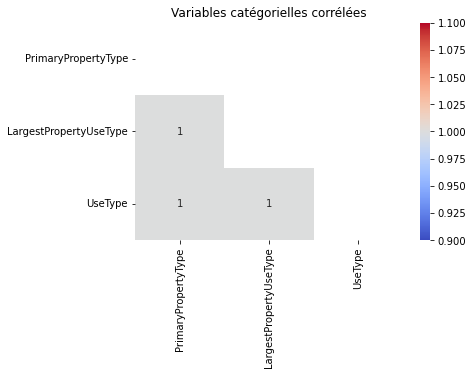

In [205]:
# visualisation sous forme de heatmap
khi2_corr = khi2_corr.astype('int')
# pour masquer la partie supérieure droite de la matrice de corrélation
mask = np.triu(np.ones_like(khi2_corr, dtype=bool))

# graph
# fig = plt.figure(figsize=(20,17))
sns.heatmap(data=khi2_corr, mask=mask, annot=True,  cmap='coolwarm')
plt.title("Variables catégorielles corrélées")
plt.show()

# PCA sur les données qui seront utilisées pour les modélisations

## Energie consommée

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 3334
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PrimaryPropertyType             1263 non-null   object 
 1   YearBuilt                       1263 non-null   int64  
 2   NumberofFloors                  1263 non-null   float64
 3   PropertyGFATotal                1263 non-null   int64  
 4   PropertyGFAParking              1263 non-null   int64  
 5   LargestPropertyUseType          1259 non-null   object 
 6   ThirdLargestPropertyUseTypeGFA  196 non-null    float64
 7   ENERGYSTARScore                 871 non-null    float64
 8   SiteEnergyUse(kBtu)             1263 non-null   float64
 9   GHGEmissions(MetricTonsCO2e)    1263 non-null   float64
 10  UseType                         1263 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 150.7+ KB


In [207]:
# selection des données
X = data.drop(['GHGEmissions(MetricTonsCO2e)'], axis=1)

X_quanti = X.select_dtypes(['float64', 'int64'])
X_categ = X.select_dtypes(['object'])

X_pca = X.drop(X_categ.columns, axis=1)

In [208]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [209]:
# préparation des données
# quantitatives

# selection des données en fonction des différents traitement à leur affecter
X_quanti_GFA = list(X_quanti.filter(regex='GFA').columns)
X_quanti_ESS = ['ENERGYSTARScore']
X_quanti_others = list(X_quanti.drop(X_quanti_GFA, axis=1).drop('ENERGYSTARScore', axis=1).columns)


GFA_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler())
ESS_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
Other_quanti_pipeline = make_pipeline(StandardScaler())

# données catégorielles
X_categ = list(X_categ.columns)

categ_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value='None'), OneHotEncoder())

features = X_pca.columns

X.shape

(1263, 10)

In [210]:
# PCA ne va pas fonctionner avec les données catégorielles transformées car génère une matrice 'sparse'
preprocessor = make_column_transformer((GFA_pipeline, X_quanti_GFA), 
                                       (ESS_pipeline, X_quanti_ESS),
                                       (Other_quanti_pipeline, X_quanti_others),
#                                        (categ_pipeline, X_categ)
                                      )

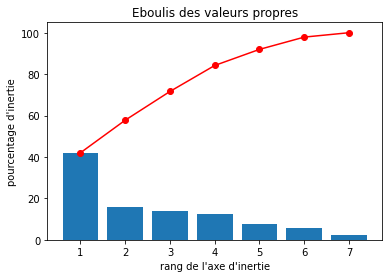

In [211]:
from sklearn import decomposition
# choix du nombre de composantes à calculer
n_comp =7

# Calcul des composantes principales
pca = make_pipeline(preprocessor, decomposition.PCA(n_components=n_comp))
pca.fit(X)

# Eboulis des valeurs propres
display_scree_plot(pca.named_steps['pca'])


In [212]:
X_transformed = pca.named_steps['columntransformer'].transform(X)

In [213]:
# critere de Kaiser
somme = 0
for rang in range(n_comp):
    somme += pca.named_steps['pca'].explained_variance_ratio_[rang]
    if pca.named_steps['pca'].explained_variance_ratio_[rang] < 1/n_comp:
        somme -= pca.named_steps['pca'].explained_variance_ratio_[rang]
        print("Il y a {} rangs d'inertie qui présentent un ratio de variance".format(rang),
              "supérieur à 1/n_comp = {:.1f}% et qui expliquent".format(100/n_comp),
              "{:.1f}% de la variance totale".format(100*somme))
        break

Il y a 2 rangs d'inertie qui présentent un ratio de variance supérieur à 1/n_comp = 14.3% et qui expliquent 57.8% de la variance totale


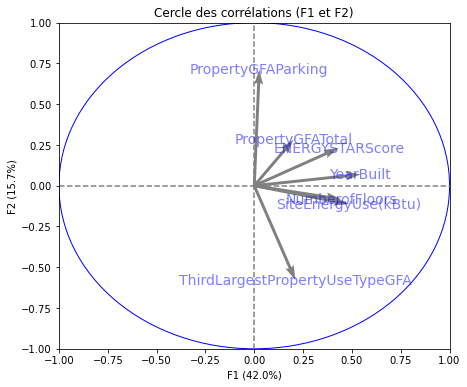

In [214]:
# Cercle des corrélations pour les 2 premiers rangs d'inertie
pcs = pca.named_steps['pca'].components_
display_circles(pcs, n_comp, pca.named_steps['pca'], [(0,1)], labels = np.array(features))

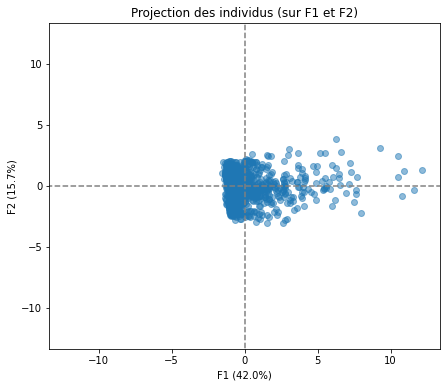

In [215]:
# Projection des individus
X_projected = pca.named_steps['pca'].transform(X_transformed)
display_factorial_planes(X_projected, n_comp, pca.named_steps['pca'], [(0,1)], alpha = 0.5)
plt.show()

## Emission de gaz à effet de serre

In [216]:
# selection des données
X = data.drop(['SiteEnergyUse(kBtu)'], axis=1)

X_quanti = X.select_dtypes(['float64', 'int64'])
X_categ = X.select_dtypes(['object'])

X_pca = X.drop(X_categ.columns, axis=1)

In [217]:
# préparation des données
# quantitatives

# selection des données en fonction des différents traitement à leur affecter
X_quanti_GFA = list(X_quanti.filter(regex='GFA').columns)
X_quanti_ESS = ['ENERGYSTARScore']
X_quanti_others = list(X_quanti.drop(X_quanti_GFA, axis=1).drop('ENERGYSTARScore', axis=1).columns)

# #GFA :
# imputer_GFA = SimpleImputer(strategy='constant', fill_value=0)
# imputer_GFA.fit_transform(X[X_quanti_GFA])


GFA_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler())
ESS_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
Other_quanti_pipeline = make_pipeline(StandardScaler())

# données catégorielles
X_categ = list(X_categ.columns)

categ_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value='None'), OneHotEncoder())

features = X_pca.columns

X.shape

(1263, 10)

In [218]:
# PCA ne va pas fonctionner avec les données catégorielles transformées car génère une matrice 'sparse'
preprocessor = make_column_transformer((GFA_pipeline, X_quanti_GFA), 
                                       (ESS_pipeline, X_quanti_ESS),
                                       (Other_quanti_pipeline, X_quanti_others),
#                                        (categ_pipeline, X_categ)
                                      )

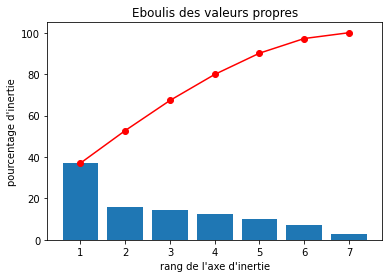

In [219]:
# choix du nombre de composantes à calculer
n_comp =7

# Calcul des composantes principales
pca = make_pipeline(preprocessor, decomposition.PCA(n_components=n_comp))
pca.fit(X)

X_transformed = pca.named_steps['columntransformer'].transform(X)

# pca = decomposition.PCA(n_components=n_comp)
# pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca.named_steps['pca'])


In [220]:
# critere de Kaiser
somme = 0
for rang in range(n_comp):
    somme += pca.named_steps['pca'].explained_variance_ratio_[rang]
    if pca.named_steps['pca'].explained_variance_ratio_[rang] < 1/n_comp:
        somme -= pca.named_steps['pca'].explained_variance_ratio_[rang]
        print("Il y a {} rangs d'inertie qui présentent un ratio de variance".format(rang),
              "supérieur à 1/n_comp = {:.2f}% et qui expliquent".format(100/n_comp),
              "{:.2f}% de la variance totale".format(100*somme))
        break

Il y a 3 rangs d'inertie qui présentent un ratio de variance supérieur à 1/n_comp = 14.29% et qui expliquent 67.30% de la variance totale


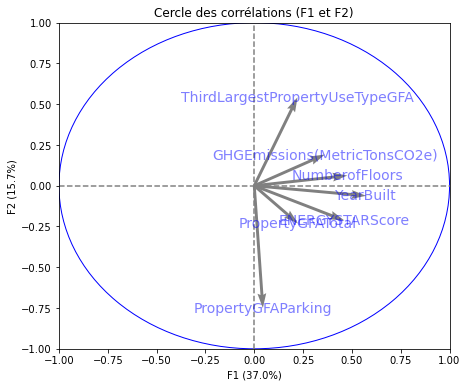

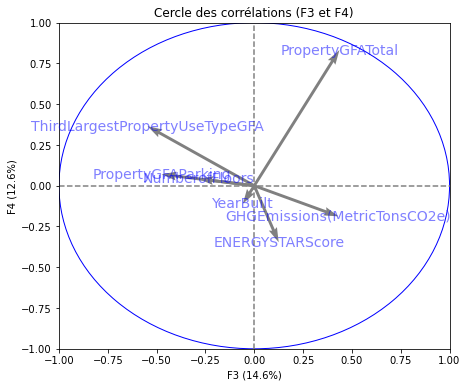

In [221]:
# Cercle des corrélations pour les 4 rangs d'inertie présentant un ratio de variance > 1/n_comp
pcs = pca.named_steps['pca'].components_
display_circles(pcs, n_comp, pca.named_steps['pca'], [(0,1),(2,3)], labels = np.array(features))

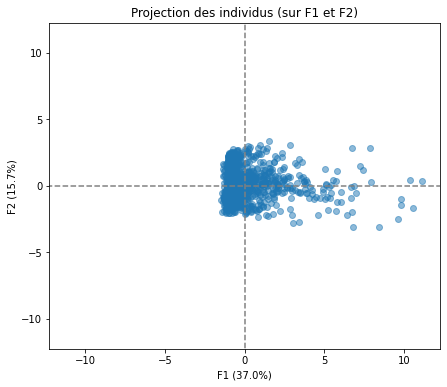

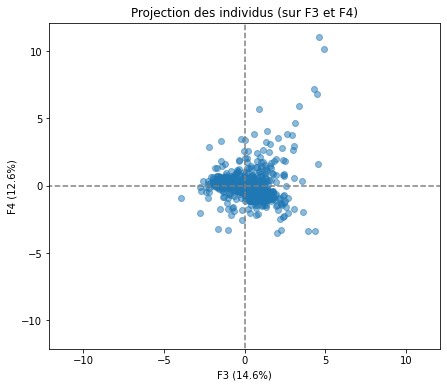

In [222]:
# Projection des individus
X_projected = pca.named_steps['pca'].transform(X_transformed)
display_factorial_planes(X_projected, n_comp, pca.named_steps['pca'], [(0,1), (2,3)], alpha = 0.5)
plt.show()

# Export des données pour construction du modèle de prédiction


In [223]:
data.to_csv('../01_DATA/data_for_modeling.csv')

In [224]:
Affichage_duree(start_time_ALL)

Temps d'exécution : 56.14s


56.1359992